# Part 2 - Model Exploration 
## Feature Extraction - Dimensionality Reduction
## Model Building 
## Class imbalance 

# Load Libraries

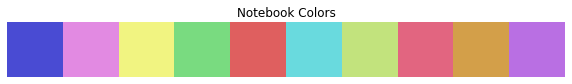

/Users/adarsh_23/mobilewalla_dataset/app_meta.txt
/Users/adarsh_23/mobilewalla_dataset/Mobilewalla_Part1_EDA.ipynb
/Users/adarsh_23/mobilewalla_dataset/app_metadata_two.csv
/Users/adarsh_23/mobilewalla_dataset/app_propensity_data.csv
/Users/adarsh_23/mobilewalla_dataset/Untitled (2).ipynb
/Users/adarsh_23/mobilewalla_dataset/mice_imputed_values.csv
/Users/adarsh_23/mobilewalla_dataset/Mobilewalla_Test_ModelTraining.ipynb
/Users/adarsh_23/mobilewalla_dataset/app_metadata.csv
/Users/adarsh_23/mobilewalla_dataset/clean_df.csv
/Users/adarsh_23/mobilewalla_dataset/train_data.csv
/Users/adarsh_23/mobilewalla_dataset/ifa_catscores.csv
/Users/adarsh_23/mobilewalla_dataset/test_data.csv
/Users/adarsh_23/mobilewalla_dataset/Mobilewalla_Part1_EDA.html
/Users/adarsh_23/mobilewalla_dataset/catboost_info/learn_error.tsv
/Users/adarsh_23/mobilewalla_dataset/catboost_info/time_left.tsv
/Users/adarsh_23/mobilewalla_dataset/catboost_info/catboost_training.json
/Users/adarsh_23/mobilewalla_dataset/catboo

In [165]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


import xgboost as xgb
colors = ['#494BD3','#E28AE2','#F1F481','#79DB80','#DF5F5F',
          '#69DADE','#C2E37D','#E26580','#D39F49','#B96FE3']

sns.palplot(sns.color_palette(colors))
plt.title('Notebook Colors', size = 12)
plt.axis('off')
plt.show()

import warnings
warnings.filterwarnings("ignore")

#/Users/adarsh_23/mobilewalla_dataset
filepath = '/Users/adarsh_23/mobilewalla_dataset'
for dirname, _, filenames in os.walk('/Users/adarsh_23/mobilewalla_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [166]:
# Loading two dataframes -
# one - clean_df.csv - cleaned dataframe - train 
# two - ifa_catscores.csv - integrated app data
df1 = pd.read_csv(os.path.join(filepath, 'clean_df.csv'))
df2 = pd.read_csv(os.path.join(filepath, 'ifa_catscores.csv'))

In [167]:
df1.head()

,ifa,platform,first_seen,last_seen,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,...,dev_cat_iab9_23,dev_cat_iab9_30,dev_cat_books,dev_cat_finance,dev_cat_games,dev_cat_lifestyle,dev_cat_navigation,dev_cat_productivity,dev_cat_reference,dev_cat_utilities
0,bf648e9f9bbe18fe6125713360be1e34dfa544b4fd91c8...,ANDROID,2020-01-02 16:07:14,2020-03-07 13:51:43,13.0,54,4.15385,1.0,8.0,0.0,...,0.000000,0.071429,0.0,0.0,0.071429,0.153061,0.0,0.081633,0.0,0.112245
1,c7317fe8366d24119d193d4c7ce5b5c9762ab70015171d...,ANDROID,2019-03-01 12:45:55,2020-01-17 17:51:51,130.0,3571,27.46923,1.0,29.0,0.0,...,0.000000,0.331195,0.0,0.0,0.257537,0.000000,0.0,0.001604,0.0,0.001710
2,ab5cc2d010deaf23dfb33a18361e40c6658c12087f4e48...,ANDROID,2019-06-06 09:46:05,2020-03-30 06:22:17,113.0,4517,39.97345,1.0,6.0,0.0,...,0.048361,0.007354,0.0,0.0,0.001122,0.000000,0.0,0.011966,0.0,0.227845
3,c7a05851bf3482a062d67c243960c4d34879ff1df44860...,ANDROID,2019-09-10 07:33:22,2020-03-31 08:27:46,112.0,6186,55.23214,1.0,36.0,0.0,...,0.000000,0.427170,0.0,0.0,0.078837,0.000000,0.0,0.006967,0.0,0.006967
4,7ee413f5f44783ebd036b30f62a7d8cd94a5a844e27416...,ANDROID,2019-09-10 06:34:52,2020-03-31 15:01:39,50.0,269,5.38000,1.0,3.0,0.0,...,0.000000,0.004723,0.0,0.0,0.000000,0.000000,0.0,0.246753,0.0,0.310508


In [168]:
df2.head()

,ifa,6000,6001,6002,6003,6004,6005,6006,6007,6008,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,00002c2abb627089988287fa9cb1569b43076bdfdad67d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.00000,0.00000,0.0,0.00708,0.0,0.17354,0.0,0.81407,0.0
1,00009f893e849715bcc809dd0891e78bc4ef9dd3061eac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7635,0.03187,0.00000,0.0,0.00646,0.0,0.02586,0.0,0.00000,0.0
2,0000ac97665d160ff6c012f0af44a13a83d0065cdd8046...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.39687,0.03031,0.0,0.00000,0.0,0.51015,0.0,0.06267,0.0
3,0000bef11e506141ce0f4159e0412038c892477ff7752b...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.01475,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0
4,000123a2d98e624b7f11b4fc81f9879bc8b7aab9c7dc75...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.37289,0.27507,0.0,0.00000,0.0,0.25724,0.0,0.09481,0.0


In [169]:
merged_df = df1.merge(df2, left_on= 'ifa', right_on='ifa')
print(merged_df.shape)
merged_df.head(5)

(189846, 111)


,ifa,platform,first_seen,last_seen,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,bf648e9f9bbe18fe6125713360be1e34dfa544b4fd91c8...,ANDROID,2020-01-02 16:07:14,2020-03-07 13:51:43,13.0,54,4.15385,1.0,8.0,0.0,...,0.0,0.00000,0.11163,0.0,0.11164,0.0,0.11166,0.11149,0.00000,0.0
1,c7317fe8366d24119d193d4c7ce5b5c9762ab70015171d...,ANDROID,2019-03-01 12:45:55,2020-01-17 17:51:51,130.0,3571,27.46923,1.0,29.0,0.0,...,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.02458,0.00000,0.00518,0.0
2,ab5cc2d010deaf23dfb33a18361e40c6658c12087f4e48...,ANDROID,2019-06-06 09:46:05,2020-03-30 06:22:17,113.0,4517,39.97345,1.0,6.0,0.0,...,0.0,0.27266,0.00000,0.0,0.04029,0.0,0.00000,0.00000,0.63930,0.0
3,c7a05851bf3482a062d67c243960c4d34879ff1df44860...,ANDROID,2019-09-10 07:33:22,2020-03-31 08:27:46,112.0,6186,55.23214,1.0,36.0,0.0,...,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.0
4,7ee413f5f44783ebd036b30f62a7d8cd94a5a844e27416...,ANDROID,2019-09-10 06:34:52,2020-03-31 15:01:39,50.0,269,5.38000,1.0,3.0,0.0,...,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.18772,0.00000,0.53382,0.0


### Columns - (ifa, first_seen, last_seen) don't seem to be contributing much to the gender prediction - let's drop them first

In [170]:
new_df = merged_df.copy()
new_df.drop(['ifa', 'first_seen','last_seen'], axis=1, inplace=True)
new_df.head()

,platform,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,skewness_male,daypart_home,daypart_other,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,ANDROID,13.0,54,4.15385,1.0,8.0,0.0,0.037037,0.62963,0.01852,...,0.0,0.00000,0.11163,0.0,0.11164,0.0,0.11166,0.11149,0.00000,0.0
1,ANDROID,130.0,3571,27.46923,1.0,29.0,0.0,0.008681,0.47797,0.11537,...,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.02458,0.00000,0.00518,0.0
2,ANDROID,113.0,4517,39.97345,1.0,6.0,0.0,0.413549,0.57619,0.14880,...,0.0,0.27266,0.00000,0.0,0.04029,0.0,0.00000,0.00000,0.63930,0.0
3,ANDROID,112.0,6186,55.23214,1.0,36.0,0.0,0.000000,0.42396,0.24654,...,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.0
4,ANDROID,50.0,269,5.38000,1.0,3.0,0.0,0.200743,0.50246,0.00985,...,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.18772,0.00000,0.53382,0.0


In [171]:
numerical = new_df.drop(['gender'], axis=1).select_dtypes('number').columns
categorical = new_df.select_dtypes('object').columns
print(f'Numerical Columns:  {new_df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {new_df[categorical].columns}')

Numerical Columns:  Index(['num_days', 'brq', 'brq_engagement', 'distinct_app', 'skewness_female',
       'skewness_male', 'daypart_home', 'daypart_other', 'daypart_work',
       'cellular',
       ...
       'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL',
       'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', length=105)


Categorical Columns: Index(['platform', 'device_category'], dtype='object')


### Categorical columns do not seem very useful. But let's not drop them just yet. 

In [172]:
platform_dummies = pd.get_dummies(new_df.platform)
device_dummies = pd.get_dummies(new_df.device_category)
new_df = pd.concat([new_df, platform_dummies], axis=1)
new_df = pd.concat([new_df, device_dummies], axis=1)
new_df.drop(['platform', 'device_category'], axis=1, inplace=True)


In [173]:
new_df.head(2)

,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,skewness_male,daypart_home,daypart_other,daypart_work,...,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,ANDROID,IOS,SMART PHONE,TABLET
0,13.0,54,4.15385,1.0,8.0,0.0,0.037037,0.62963,0.01852,0.35185,...,0.11164,0.0,0.11166,0.11149,0.00000,0.0,1,0,1,0
1,130.0,3571,27.46923,1.0,29.0,0.0,0.008681,0.47797,0.11537,0.40666,...,0.00000,0.0,0.02458,0.00000,0.00518,0.0,1,0,1,0


In [380]:
new_df.to_csv('easychecker.csv',index = False)

## Train dataframe is ready for Scaling 

# Test Dataframe - Clean up

In [251]:
test = pd.read_csv(os.path.join(filepath, 'test_data.csv'))


In [252]:
print(test.shape)
test.head(2)

(49737, 43)


,ifa,platform,first_seen,last_seen,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,...,dev_cat_iab9_23,dev_cat_iab9_30,dev_cat_books,dev_cat_finance,dev_cat_games,dev_cat_lifestyle,dev_cat_navigation,dev_cat_productivity,dev_cat_reference,dev_cat_utilities
0,8e932096849088aa76a953ce2f69728db6b6cdc056cd91...,ANDROID,2020-02-23 07:33:14,2020-02-23 09:25:14,1.0,370,370.0,-1.0,1.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9ba004d2e45aa4ae05935634f6198bf81e8766cb76a2bc...,IOS,2020-02-04 11:15:37,2020-02-04 11:15:37,1.0,1,1.0,-1.0,NaN,0.0,...,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
test_merged = test.merge(df2, left_on= 'ifa', right_on='ifa', how = 'left')
print(test_merged.shape)
test_merged.head(5)

(49737, 111)


,ifa,platform,first_seen,last_seen,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,8e932096849088aa76a953ce2f69728db6b6cdc056cd91...,ANDROID,2020-02-23 07:33:14,2020-02-23 09:25:14,1.0,370,370.00000,-1.0,1.0,0.0,...,0.0,0.00000,0.0,0.0,1.0,0.0,0.00000,0.0,0.00000,0.0
1,9ba004d2e45aa4ae05935634f6198bf81e8766cb76a2bc...,IOS,2020-02-04 11:15:37,2020-02-04 11:15:37,1.0,1,1.00000,-1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17a74969d7681ff8e206aeb7ba0e83300c8d4ed1f6db80...,ANDROID,2018-09-25 13:37:09,2020-03-05 15:58:05,172.0,6448,37.48837,-1.0,12.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.06166,0.0,0.48771,0.0
3,c8f3ddc5e2b0b3deacdb49181bc170363e5d01c992a660...,ANDROID,2020-03-13 15:42:34,2020-03-31 21:52:39,16.0,598,37.37500,-1.0,2.0,0.0,...,0.0,0.28409,0.0,0.0,0.0,0.0,0.00000,0.0,0.71591,0.0
4,9c0c1acf953e443c577a30350a723ddf0a818e0763dce3...,ANDROID,2020-03-18 09:17:21,2020-03-31 07:51:58,3.0,4,1.33333,-1.0,2.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.58448,0.0,0.41552,0.0


In [254]:
platform_dummies_test = pd.get_dummies(test_merged.platform)
device_dummies_test = pd.get_dummies(test_merged.device_category)
test_merged = pd.concat([test_merged, platform_dummies_test], axis=1)
test_merged= pd.concat([test_merged, device_dummies_test], axis=1)
test_ifa_vals = test_merged['ifa']
# Dropping unnecessary columns

test_merged.drop(['ifa', 'first_seen','last_seen','platform','device_category'], axis=1, inplace=True)

test_merged.head()

,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,skewness_male,daypart_home,daypart_other,daypart_work,...,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,ANDROID,IOS,SMART PHONE,TABLET
0,1.0,370,370.00000,-1.0,1.0,0.0,0.948649,1.00000,0.00000,0.00000,...,1.0,0.0,0.00000,0.0,0.00000,0.0,1,0,1,0
1,1.0,1,1.00000,-1.0,NaN,0.0,0.000000,0.00000,0.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
2,172.0,6448,37.48837,-1.0,12.0,0.0,0.207196,0.56620,0.03567,0.39813,...,0.0,0.0,0.06166,0.0,0.48771,0.0,1,0,1,0
3,16.0,598,37.37500,-1.0,2.0,0.0,0.765886,0.73746,0.08528,0.17726,...,0.0,0.0,0.00000,0.0,0.71591,0.0,1,0,1,0
4,3.0,4,1.33333,-1.0,2.0,0.0,0.500000,0.25000,0.00000,0.75000,...,0.0,0.0,0.58448,0.0,0.41552,0.0,1,0,1,0


In [255]:
print(test_merged.shape)

(49737, 110)


In [256]:
print(test_merged.isnull().values.any())
test_merged.isnull().values.sum()

True


125341

In [257]:
xdf = test_merged.isnull().sum()
xdf[xdf > 0]

distinct_app         261
cellular              11
wifi                  11
dev_cat_iab1          63
dev_cat_iab1_1        63
                    ... 
SPORTS              1815
TOOLS               1815
TRAVEL_AND_LOCAL    1815
VIDEO_PLAYERS       1815
WEATHER             1815
Length: 97, dtype: int64

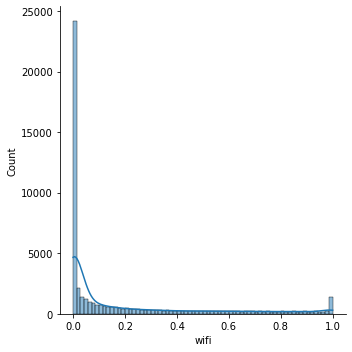

In [258]:
sns.displot(test_merged['wifi'],kde=True)

In [264]:
xdf.index[:38]

Index(['num_days', 'brq', 'brq_engagement', 'gender', 'distinct_app',
       'skewness_female', 'skewness_male', 'daypart_home', 'daypart_other',
       'daypart_work', 'cellular', 'wifi', 'dev_cat_iab1', 'dev_cat_iab1_1',
       'dev_cat_iab1_6', 'dev_cat_iab12', 'dev_cat_iab13', 'dev_cat_iab14',
       'dev_cat_iab15', 'dev_cat_iab15_10', 'dev_cat_iab17', 'dev_cat_iab19',
       'dev_cat_iab19_29', 'dev_cat_iab20', 'dev_cat_iab3', 'dev_cat_iab5',
       'dev_cat_iab7', 'dev_cat_iab9', 'dev_cat_iab9_23', 'dev_cat_iab9_30',
       'dev_cat_books', 'dev_cat_finance', 'dev_cat_games',
       'dev_cat_lifestyle', 'dev_cat_navigation', 'dev_cat_productivity',
       'dev_cat_reference', 'dev_cat_utilities'],
      dtype='object')

In [266]:
# Impute - median value
for cols_xdf in xdf.index[:]:
    test_merged[cols_xdf] = test_merged[cols_xdf].fillna(test_merged[cols_xdf].median())

In [274]:
print(test_merged.isnull().values.any())
print(new_df.shape)
print(test_merged.shape)

False
(189846, 110)
(49737, 110)


In [408]:
pd.DataFrame.to_csv?

Signature:
pd.DataFrame.to_csv(
    self,
    path_or_buf: 'FilePathOrBuffer[AnyStr] | None' = None,
    sep: 'str' = ',',
    na_rep: 'str' = '',
    float_format: 'str | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'bool_t | list[str]' = True,
    index: 'bool_t' = True,
    index_label: 'IndexLabel | None' = None,
    mode: 'str' = 'w',
    encoding: 'str | None' = None,
    compression: 'CompressionOptions' = 'infer',
    quoting: 'int | None' = None,
    quotechar: 'str' = '"',
    line_terminator: 'str | None' = None,
    chunksize: 'int | None' = None,
    date_format: 'str | None' = None,
    doublequote: 'bool_t' = True,
    escapechar: 'str | None' = None,
    decimal: 'str' = '.',
    errors: 'str' = 'strict',
    storage_options: 'StorageOptions' = None,
) -> 'str | None'
Docstring:
Write object to a comma-separated values (csv) file.

Parameters
----------
path_or_buf : str or file handle, default None
    File path or object, if None is provi

In [412]:
test_merged.to_csv('test_input_file.csv',index = False)

In [413]:
check_df = pd.read_csv('test_input_file.csv')
check_df
#ifa values in 

,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,skewness_male,daypart_home,daypart_other,daypart_work,...,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,ANDROID,IOS,SMART PHONE,TABLET
0,1.0,370,370.00000,-1.0,1.0,0.0,0.948649,1.00000,0.00000,0.00000,...,1.0,0.0,0.00000,0.0,0.00000,0.0,1,0,1,0
1,1.0,1,1.00000,-1.0,7.0,0.0,0.000000,0.00000,0.00000,1.00000,...,0.0,0.0,0.04011,0.0,0.02931,0.0,0,1,0,0
2,172.0,6448,37.48837,-1.0,12.0,0.0,0.207196,0.56620,0.03567,0.39813,...,0.0,0.0,0.06166,0.0,0.48771,0.0,1,0,1,0
3,16.0,598,37.37500,-1.0,2.0,0.0,0.765886,0.73746,0.08528,0.17726,...,0.0,0.0,0.00000,0.0,0.71591,0.0,1,0,1,0
4,3.0,4,1.33333,-1.0,2.0,0.0,0.500000,0.25000,0.00000,0.75000,...,0.0,0.0,0.58448,0.0,0.41552,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49732,18.0,212,11.77778,-1.0,4.0,0.0,0.415094,0.28834,0.07975,0.63190,...,0.0,0.0,0.00000,0.0,0.00000,0.0,1,0,1,0
49733,11.0,64,5.81818,-1.0,2.0,0.0,0.093750,0.08333,0.08333,0.83333,...,0.0,0.0,0.04011,0.0,0.02931,0.0,0,1,1,0
49734,65.0,2328,35.81538,-1.0,18.0,0.0,0.000000,0.28516,0.25223,0.46261,...,0.0,0.0,0.00633,0.0,0.00000,0.0,1,0,1,0
49735,118.0,2637,22.34746,-1.0,39.0,0.0,0.050057,0.78875,0.00902,0.20223,...,0.0,0.0,0.00000,0.0,0.00616,0.0,1,0,1,0


## Test requirements
#### test_merged - dataframe - X = test_merged.drop('gender', axis=1)
#### test_ifa_vals - final concat
#### -----------------------------------------------------------

# Train Input - Making Model ready

In [184]:
new_df.head(2)

,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,skewness_male,daypart_home,daypart_other,daypart_work,...,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,ANDROID,IOS,SMART PHONE,TABLET
0,13.0,54,4.15385,1.0,8.0,0.0,0.037037,0.62963,0.01852,0.35185,...,0.11164,0.0,0.11166,0.11149,0.00000,0.0,1,0,1,0
1,130.0,3571,27.46923,1.0,29.0,0.0,0.008681,0.47797,0.11537,0.40666,...,0.00000,0.0,0.02458,0.00000,0.00518,0.0,1,0,1,0


In [185]:
Y = new_df['gender']
X = new_df.drop('gender', axis=1)

## ----------------------------------------------------------------------------------------------
## Ideally on imbalanced classes - several over/under sampling techniques are used to capture better model. Also, in such cases accuracy score is not the correct representative of the actual model performance since F1 scores are pretty low for the minority class.

### Let us here, observe the model performances in cases with and without imbalance treatment.

### Let's also perform PCA later on and see how that should ideally provide good results with less bulky models.


## ----------------------------------------------------------------------------
# Class imbalanced data - Run as is - No PCA, No balancing techniques used -

## Libraries for Models

In [186]:
# Libraries for Models
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,average_precision_score,f1_score,recall_score

In [187]:
#Baseline models
model_names =[]
accuracy =[]
precision = []
recall = []
fscore = []
rocaucscore = []

In [188]:
# Dummy Classifier - Baseline Classifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ss = StandardScaler()

model = DummyClassifier(strategy='constant', constant=1)
pipe = make_pipeline(ss, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print (f'model : {model} and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
print (f'model : {model} and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
print(classification_report(y_test, y_pred))
model_names = ['DummyClassifier']
dummy_result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
dummy_result_df

model : DummyClassifier(constant=1, strategy='constant') and  roc_auc_score score is : 0.5
model : DummyClassifier(constant=1, strategy='constant') and  accuracy score is : 0.8768
model : DummyClassifier(constant=1, strategy='constant') and  average_precision_score score is : 0.8768
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7015
         1.0       0.88      1.00      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.44      0.50      0.47     56954
weighted avg       0.77      0.88      0.82     56954



,Accuracy
DummyClassifier,0.8768


In [189]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipe, X_train, y_train)
scores

{'fit_time': array([0.38568306, 0.31777787, 0.35300088, 0.31308484, 0.29583788]),
 'score_time': array([0.05810881, 0.04738688, 0.05275798, 0.04264402, 0.04483819]),
 'test_score': array([0.87523985, 0.87523985, 0.87527278, 0.87527278, 0.87523516])}

In [190]:
scores['test_score'].mean()

0.8752520845834748

# Storing Model Outputs -

## Running the models on Original Data Scaled using StandardScaler - with 70-30 Split

In [192]:
#Baseline models
model_names =[]
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

dummy = DummyClassifier(strategy='constant', constant=1)
lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
#svm = SVC(gamma='scale')
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

models = [dummy,lr,lda,knn,ada,gb,rf,et,xgbc,lgbmc,catb]

for model in models: 
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    precision_one.append(round(average_precision_score(y_test, y_pred),4))
    precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    fscore_one.append(round(f1_score(y_test, y_pred),4))
    fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    recall_one.append(round(recall_score(y_test, y_pred),4))
    recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
    rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
    #print (f'model : {model} and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
    print("Current model classification report: ", model)
    print(classification_report(y_test, y_pred))

model_names = ['DummyClassifier','LogisticRegression','LDA','KNeighborsClassifier','ADABoostClassifier','GradientBoostClassifier','RandomForestClassifier','ExtraTreeClassifier','XGBoostClassifier','LightGBMClassifier','CatBoostClassifier']
result_df1 = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
result_df1

Current model classification report:  DummyClassifier(constant=1, strategy='constant')
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7015
         1.0       0.88      1.00      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.44      0.50      0.47     56954
weighted avg       0.77      0.88      0.82     56954

Current model classification report:  LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.54      0.21      0.30      7015
         1.0       0.90      0.97      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.72      0.59      0.62     56954
weighted avg       0.85      0.88      0.86     56954

Current model classification report:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

         0.0       0.49      0.36      0.42      7015
      

,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
DummyClassifier,0.8768,0.8768,0.1232,1.0000,0.0000,0.5000,0.9344,0.0000
LogisticRegression,0.8803,0.8974,0.1065,0.9742,0.2117,0.5930,0.9345,0.3035
LDA,0.8751,0.9114,0.0998,0.9475,0.3601,0.6538,0.9301,0.4154
KNeighborsClassifier,0.8697,0.9016,0.1042,0.9542,0.2683,0.6112,0.9277,0.3365
ADABoostClassifier,0.8808,0.9153,0.0985,0.9495,0.3913,0.6704,0.9332,0.4471
GradientBoostClassifier,0.8853,0.9064,0.1017,0.9679,0.2971,0.6325,0.9367,0.3894
RandomForestClassifier,0.8820,0.9035,0.1031,0.9677,0.2721,0.6199,0.9350,0.3623
ExtraTreeClassifier,0.8826,0.9002,0.1049,0.9733,0.2372,0.6052,0.9357,0.3324
XGBoostClassifier,0.8859,0.9115,0.0996,0.9617,0.3464,0.6540,0.9366,0.4278
LightGBMClassifier,0.8864,0.9071,0.1013,0.9684,0.3025,0.6355,0.9373,0.3962


## Let's use PCA now - 

In [193]:
from sklearn.decomposition import PCA
ss = StandardScaler()
X_ss = ss.fit_transform(X)
pca = PCA()
pca = pca.fit(X_ss)
X_transformed = pca.transform(X_ss)

In [194]:
pca.n_components_

109

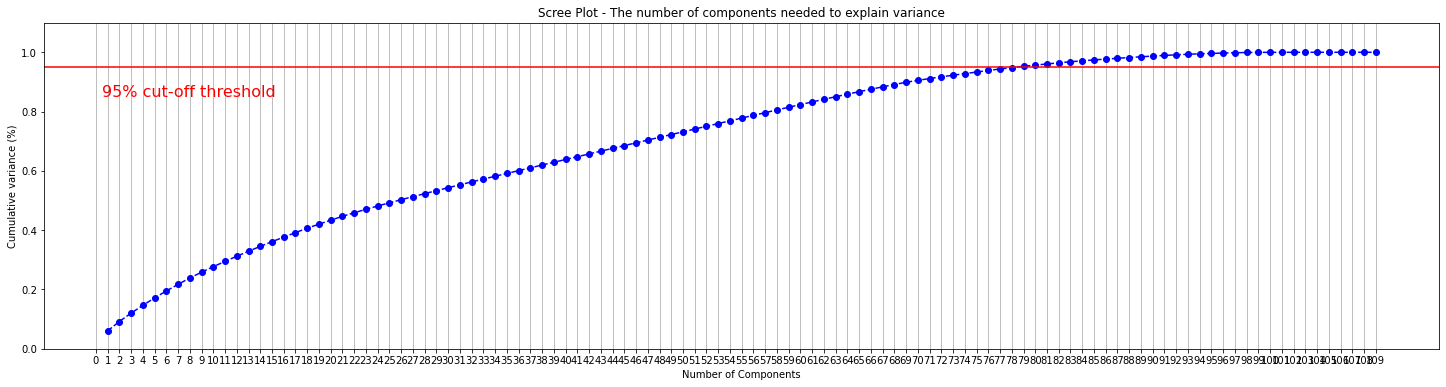

In [195]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (25,6)

fig, ax = plt.subplots()
xi = np.arange(1, 110, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 110, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('Scree Plot - The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

## With 78 components about 95% variance is captured!

In [196]:
pca = PCA(n_components= 78)
pca = pca.fit(X_ss)
X_pca = pca.transform(X_ss)

In [197]:
X_pca = pd.DataFrame(X_pca)

In [198]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,-0.072971,-1.460001,0.843851,-0.031405,-0.198537,0.041218,3.639129,-0.666183,-0.375089,-0.180246,...,0.783823,0.597565,-0.698986,-0.155929,1.531082,0.153715,-1.173616,-0.983218,1.003078,-0.709471
1,4.729662,-0.076566,0.424369,1.257941,-0.715867,-0.178679,-0.627939,-0.775879,-0.281483,0.125241,...,-0.089851,1.043801,-1.117287,0.161797,0.086142,-0.329366,0.459452,-1.244365,-1.428857,0.204333
2,-2.433413,2.325575,-2.094361,0.765568,-0.155164,0.177166,-0.383571,-0.439822,0.786435,-0.289955,...,0.201362,-0.427234,0.176529,-0.014020,0.148487,0.030766,0.077516,0.620877,0.334703,-0.498613
3,5.563926,0.304788,0.653972,1.277377,-0.905252,-0.192487,-0.805909,-1.100770,0.067372,0.028372,...,0.044589,0.242338,-0.139068,0.052924,0.248148,0.186457,-0.248181,-0.111156,0.046751,0.770481
4,-3.309271,-2.069686,-0.797775,-0.065407,0.030175,-0.020236,-0.604636,-0.081661,1.109055,-0.366882,...,0.190988,-0.233212,-0.245115,-0.011588,0.258121,0.363643,-0.006449,0.470935,0.686676,0.015295


### Let's run the same above models using the pca data and see the output --

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)
#For PCA transformed Data models
model_names =[]
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

dummy = DummyClassifier(strategy='constant', constant=1)
lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
#svm = SVC(gamma='scale')
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

models = [dummy,lr,lda,knn,ada,gb,rf,et,xgbc,lgbmc,catb]

for model in models: 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    precision_one.append(round(average_precision_score(y_test, y_pred),4))
    precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    fscore_one.append(round(f1_score(y_test, y_pred),4))
    fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    recall_one.append(round(recall_score(y_test, y_pred),4))
    recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
    rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
    #print (f'model : {model} and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
    print("Current model classification report: ", model)
    print(classification_report(y_test, y_pred))

model_names = ['DummyClassifier','LogisticRegression','LDA','KNeighborsClassifier','ADABoostClassifier','GradientBoostClassifier','RandomForestClassifier','ExtraTreeClassifier','XGBoostClassifier','LightGBMClassifier','CatBoostClassifier']
result_pca_transformed = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
result_pca_transformed

Current model classification report:  DummyClassifier(constant=1, strategy='constant')
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7015
         1.0       0.88      1.00      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.44      0.50      0.47     56954
weighted avg       0.77      0.88      0.82     56954

Current model classification report:  LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.52      0.19      0.28      7015
         1.0       0.90      0.98      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.71      0.58      0.61     56954
weighted avg       0.85      0.88      0.85     56954

Current model classification report:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

         0.0       0.49      0.35      0.41      7015
      

,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
DummyClassifier,0.8768,0.8768,0.1232,1.0000,0.0000,0.5000,0.9344,0.0000
LogisticRegression,0.8789,0.8952,0.1079,0.9755,0.1913,0.5834,0.9339,0.2801
LDA,0.8752,0.9107,0.1001,0.9486,0.3524,0.6505,0.9302,0.4102
KNeighborsClassifier,0.8685,0.9010,0.1045,0.9534,0.2637,0.6086,0.9271,0.3306
ADABoostClassifier,0.8768,0.8972,0.1067,0.9698,0.2145,0.5922,0.9324,0.3002
GradientBoostClassifier,0.8795,0.8974,0.1065,0.9730,0.2133,0.5932,0.9340,0.3035
RandomForestClassifier,0.8790,0.8940,0.1087,0.9774,0.1785,0.5779,0.9340,0.2664
ExtraTreeClassifier,0.8788,0.8928,0.1095,0.9789,0.1666,0.5727,0.9341,0.2530
XGBoostClassifier,0.8789,0.9011,0.1044,0.9671,0.2513,0.6092,0.9334,0.3383
LightGBMClassifier,0.8819,0.8980,0.1061,0.9754,0.2160,0.5957,0.9354,0.3105


## We can see that although accuracy is good, recall,precision,f1scores are low for class zero which is the minority class.
### That is because we have an imbalanced data set.

### Let's try and resolve that!

### ------------------------------------------------------------------------------------------------------------
# Class Imbalance techniques - "imblearn"

## Over Sampling 
- Random Over Sampling
- SMOTE
## Under Sampling 
- Random Under Sampling
- Near Miss
- Tomek Links
## Combined Approaches
- Smote + Tomek 
- Smote + ENN



In [201]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN,SMOTETomek
from collections import Counter

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

## Random Over Sampling - Over PCA transformed Data

In [203]:
#Random Over Sampling
ros = RandomOverSampler(random_state=42)
#ros = ros.fit(X_pca, Y)
X_resampled_os, y_resampled_os = ros.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_resampled_os))

original dataset shape: Counter({1.0: 116314, 0.0: 16578})
Resample dataset shape Counter({1.0: 116314, 0.0: 116314})


In [204]:
#X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)
#For PCA transformed Data models
model_names =[]
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

dummy = DummyClassifier(strategy='constant', constant=1)
lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
#svm = SVC(gamma='scale')
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

models = [dummy,lr,lda,knn,ada,gb,rf,et,xgbc,lgbmc,catb]

for model in models: 
    model.fit(X_resampled_os, y_resampled_os)
    y_pred = model.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    precision_one.append(round(average_precision_score(y_test, y_pred),4))
    precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    fscore_one.append(round(f1_score(y_test, y_pred),4))
    fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    recall_one.append(round(recall_score(y_test, y_pred),4))
    recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
    rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
    #print (f'model : {model} and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
    print("Current model classification report: ", model)
    print(classification_report(y_test, y_pred))

model_names = ['DummyClassifier','LogisticRegression','LDA','KNeighborsClassifier','ADABoostClassifier','GradientBoostClassifier','RandomForestClassifier','ExtraTreeClassifier','XGBoostClassifier','LightGBMClassifier','CatBoostClassifier']
ros_pca_transformed = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
ros_pca_transformed

Current model classification report:  DummyClassifier(constant=1, strategy='constant')
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7015
         1.0       0.88      1.00      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.44      0.50      0.47     56954
weighted avg       0.77      0.88      0.82     56954

Current model classification report:  LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.34      0.77      0.47      7015
         1.0       0.96      0.79      0.86     49939

    accuracy                           0.78     56954
   macro avg       0.65      0.78      0.67     56954
weighted avg       0.88      0.78      0.82     56954

Current model classification report:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

         0.0       0.34      0.76      0.47      7015
      

,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
DummyClassifier,0.8768,0.8768,0.1232,1.0000,0.0000,0.5000,0.9344,0.0000
LogisticRegression,0.7838,0.9422,0.1038,0.7862,0.7666,0.7764,0.8645,0.4663
LDA,0.7876,0.9420,0.1034,0.7915,0.7599,0.7757,0.8673,0.4685
KNeighborsClassifier,0.7681,0.9244,0.1005,0.7883,0.6241,0.7062,0.8563,0.3986
ADABoostClassifier,0.7717,0.9398,0.1037,0.7732,0.7605,0.7669,0.8559,0.4507
GradientBoostClassifier,0.8019,0.9426,0.1027,0.8096,0.7474,0.7785,0.8776,0.4817
RandomForestClassifier,0.8734,0.9060,0.1020,0.9528,0.3082,0.6305,0.9296,0.3749
ExtraTreeClassifier,0.8778,0.8904,0.1113,0.9812,0.1423,0.5617,0.9337,0.2229
XGBoostClassifier,0.8197,0.9397,0.1006,0.8366,0.6996,0.7681,0.8906,0.4888
LightGBMClassifier,0.8091,0.9442,0.1028,0.8170,0.7534,0.7852,0.8824,0.4930


## Random Under Sampling

In [205]:
#Random Under Sampling
rus = RandomUnderSampler(random_state=42)
#rus.fit(X_pca, y)
X_resampled_us, y_resampled_us = rus.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_resampled_us))

original dataset shape: Counter({1.0: 116314, 0.0: 16578})
Resample dataset shape Counter({0.0: 16578, 1.0: 16578})


In [206]:
#X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)
#For PCA transformed Data models
model_names =[]
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

dummy = DummyClassifier(strategy='constant', constant=1)
lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
#svm = SVC(gamma='scale')
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

models = [dummy,lr,lda,knn,ada,gb,rf,et,xgbc,lgbmc,catb]

for model in models: 
    model.fit(X_resampled_us, y_resampled_us)
    y_pred = model.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    precision_one.append(round(average_precision_score(y_test, y_pred),4))
    precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    fscore_one.append(round(f1_score(y_test, y_pred),4))
    fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    recall_one.append(round(recall_score(y_test, y_pred),4))
    recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
    rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
    #print (f'model : {model} and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
    print("Current model classification report: ", model)
    print(classification_report(y_test, y_pred))

model_names = ['DummyClassifier','LogisticRegression','LDA','KNeighborsClassifier','ADABoostClassifier','GradientBoostClassifier','RandomForestClassifier','ExtraTreeClassifier','XGBoostClassifier','LightGBMClassifier','CatBoostClassifier']
rus_pca_transformed = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
rus_pca_transformed

Current model classification report:  DummyClassifier(constant=1, strategy='constant')
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7015
         1.0       0.88      1.00      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.44      0.50      0.47     56954
weighted avg       0.77      0.88      0.82     56954

Current model classification report:  LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.33      0.77      0.46      7015
         1.0       0.96      0.78      0.86     49939

    accuracy                           0.78     56954
   macro avg       0.65      0.78      0.66     56954
weighted avg       0.88      0.78      0.81     56954

Current model classification report:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

         0.0       0.34      0.77      0.47      7015
      

,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
DummyClassifier,0.8768,0.8768,0.1232,1.0000,0.0000,0.5000,0.9344,0.0000
LogisticRegression,0.7814,0.9420,0.1039,0.7833,0.7682,0.7758,0.8627,0.4640
LDA,0.7861,0.9425,0.1037,0.7889,0.7662,0.7775,0.8661,0.4687
KNeighborsClassifier,0.7400,0.9345,0.1038,0.7384,0.7518,0.7451,0.8328,0.4160
ADABoostClassifier,0.7681,0.9390,0.1036,0.7696,0.7578,0.7637,0.8534,0.4460
GradientBoostClassifier,0.7990,0.9435,0.1032,0.8045,0.7595,0.7820,0.8753,0.4820
RandomForestClassifier,0.7874,0.9415,0.1032,0.7919,0.7555,0.7737,0.8672,0.4668
ExtraTreeClassifier,0.7828,0.9405,0.1032,0.7871,0.7524,0.7698,0.8641,0.4605
XGBoostClassifier,0.7716,0.9412,0.1042,0.7715,0.7726,0.7721,0.8556,0.4546
LightGBMClassifier,0.7919,0.9438,0.1039,0.7947,0.7713,0.7830,0.8701,0.4772


## SMOTE

In [207]:
# Smote
smote = SMOTE(random_state=42,sampling_strategy = "not majority")
X_sm, y_sm = smote.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_sm))

original dataset shape: Counter({1.0: 116314, 0.0: 16578})
Resample dataset shape Counter({1.0: 116314, 0.0: 116314})


In [208]:
#X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)
#For PCA transformed Data models
model_names =[]
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

dummy = DummyClassifier(strategy='constant', constant=1)
lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
#svm = SVC(gamma='scale')
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

models = [dummy,lr,lda,knn,ada,gb,rf,et,xgbc,lgbmc,catb]

for model in models: 
    model.fit(X_sm, y_sm)
    y_pred = model.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    precision_one.append(round(average_precision_score(y_test, y_pred),4))
    precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    fscore_one.append(round(f1_score(y_test, y_pred),4))
    fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    recall_one.append(round(recall_score(y_test, y_pred),4))
    recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
    rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
    #print (f'model : {model} and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
    print("Current model classification report: ", model)
    print(classification_report(y_test, y_pred))

model_names = ['DummyClassifier','LogisticRegression','LDA','KNeighborsClassifier','ADABoostClassifier','GradientBoostClassifier','RandomForestClassifier','ExtraTreeClassifier','XGBoostClassifier','LightGBMClassifier','CatBoostClassifier']
smote_pca_transformed = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
smote_pca_transformed

Current model classification report:  DummyClassifier(constant=1, strategy='constant')
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7015
         1.0       0.88      1.00      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.44      0.50      0.47     56954
weighted avg       0.77      0.88      0.82     56954

Current model classification report:  LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.34      0.76      0.47      7015
         1.0       0.96      0.79      0.87     49939

    accuracy                           0.79     56954
   macro avg       0.65      0.78      0.67     56954
weighted avg       0.88      0.79      0.82     56954

Current model classification report:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

         0.0       0.35      0.75      0.47      7015
      

,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
DummyClassifier,0.8768,0.8768,0.1232,1.0000,0.0000,0.5000,0.9344,0.0000
LogisticRegression,0.7899,0.9421,0.1033,0.7944,0.7582,0.7763,0.8690,0.4706
LDA,0.7941,0.9418,0.1029,0.8002,0.7505,0.7754,0.8721,0.4731
KNeighborsClassifier,0.7361,0.9270,0.1021,0.7428,0.6882,0.7155,0.8315,0.3911
ADABoostClassifier,0.7781,0.9382,0.1026,0.7837,0.7378,0.7608,0.8610,0.4503
GradientBoostClassifier,0.8088,0.9418,0.1020,0.8195,0.7326,0.7760,0.8826,0.4855
RandomForestClassifier,0.8536,0.9267,0.0974,0.8983,0.5356,0.7169,0.9150,0.4741
ExtraTreeClassifier,0.8581,0.9230,0.0975,0.9090,0.4954,0.7022,0.9183,0.4623
XGBoostClassifier,0.8134,0.9390,0.1008,0.8292,0.7015,0.7653,0.8863,0.4809
LightGBMClassifier,0.8120,0.9425,0.1020,0.8229,0.7344,0.7787,0.8848,0.4905


## Near Miss

In [209]:
# Near Miss
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({1.0: 116314, 0.0: 16578})
Resample dataset shape: Counter({0.0: 16578, 1.0: 16578})


In [210]:
#X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)
#For PCA transformed Data models
model_names =[]
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

dummy = DummyClassifier(strategy='constant', constant=1)
lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
#svm = SVC(gamma='scale')
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

models = [dummy,lr,lda,knn,ada,gb,rf,et,xgbc,lgbmc,catb]

for model in models: 
    model.fit(X_nm, y_nm)
    y_pred = model.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    precision_one.append(round(average_precision_score(y_test, y_pred),4))
    precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    fscore_one.append(round(f1_score(y_test, y_pred),4))
    fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    recall_one.append(round(recall_score(y_test, y_pred),4))
    recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
    rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
    #print (f'model : {model} and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
    print("Current model classification report: ", model)
    print(classification_report(y_test, y_pred))

model_names = ['DummyClassifier','LogisticRegression','LDA','KNeighborsClassifier','ADABoostClassifier','GradientBoostClassifier','RandomForestClassifier','ExtraTreeClassifier','XGBoostClassifier','LightGBMClassifier','CatBoostClassifier']
nearmiss_pca_transformed = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
nearmiss_pca_transformed


Current model classification report:  DummyClassifier(constant=1, strategy='constant')
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7015
         1.0       0.88      1.00      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.44      0.50      0.47     56954
weighted avg       0.77      0.88      0.82     56954

Current model classification report:  LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.16      0.77      0.27      7015
         1.0       0.93      0.44      0.60     49939

    accuracy                           0.48     56954
   macro avg       0.55      0.61      0.43     56954
weighted avg       0.84      0.48      0.56     56954

Current model classification report:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

         0.0       0.17      0.81      0.28      7015
      

,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
DummyClassifier,0.8768,0.8768,0.1232,1.0000,0.0000,0.5000,0.9344,0.0000
LogisticRegression,0.4793,0.9009,0.1106,0.4382,0.7719,0.6050,0.5961,0.2675
LDA,0.4989,0.9075,0.1103,0.4554,0.8087,0.6320,0.6144,0.2845
KNeighborsClassifier,0.4926,0.8932,0.1119,0.4664,0.6791,0.5728,0.6172,0.2480
ADABoostClassifier,0.4109,0.8925,0.1135,0.3593,0.7788,0.5690,0.5168,0.2457
GradientBoostClassifier,0.3968,0.8931,0.1137,0.3397,0.8030,0.5713,0.4969,0.2469
RandomForestClassifier,0.3434,0.8888,0.1158,0.2749,0.8311,0.5530,0.4233,0.2377
ExtraTreeClassifier,0.3527,0.8898,0.1154,0.2858,0.8285,0.5572,0.4364,0.2397
XGBoostClassifier,0.3656,0.8886,0.1154,0.3046,0.7999,0.5522,0.4571,0.2370
LightGBMClassifier,0.3754,0.8899,0.1149,0.3157,0.8001,0.5579,0.4699,0.2399


## Tomek Links

In [ ]:
#Tomek Links - slow
tl = TomekLinks(sampling_strategy ='majority')
X_tl, y_tl = tl.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_tl))

#### Runs super slow on our big big dataset!

In [ ]:
## Delete later
scores = []
pred_test = lr.predict(X_test.values)
pred_test_probs = lr.predict_proba(X_test.values)
probs = lr.decision_function(X_test.values)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),pred_test)
p,r,t = precision_recall_curve(y_test.values.ravel(),probs)
scores.append(("weighted_base",
                           f1_score(y_test.values.ravel(),pred_test),
                           precision_score(y_test.values.ravel(),pred_test),
                           recall_score(y_test.values.ravel(),pred_test),
                           accuracy_score(y_test.values.ravel(),pred_test),
                           auc(fpr, tpr),
                           auc(p,r,reorder=True),
                           confusion_matrix(y_test.values.ravel(),pred_test)))

scores = pd.DataFrame(scores,columns=['Sampling Type','f1','precision','recall','accuracy','auc_roc','auc_pr','confusion_matrix'])
### To capture all metrics in one df - for final model

## Smote with Tomek


In [211]:
# Smotetomek - Over + Under sampling
smotek = SMOTETomek(random_state=42)
X_smotek, y_smotek = smotek.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_smotek))


original dataset shape: Counter({1.0: 116314, 0.0: 16578})
Resample dataset shape Counter({1.0: 116015, 0.0: 116015})


In [212]:
#X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)
#For PCA transformed Data models
model_names =[]
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

dummy = DummyClassifier(strategy='constant', constant=1)
lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
#svm = SVC(gamma='scale')
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

models = [dummy,lr,lda,knn,ada,gb,rf,et,xgbc,lgbmc,catb]

for model in models: 
    model.fit(X_smotek, y_smotek)
    y_pred = model.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    precision_one.append(round(average_precision_score(y_test, y_pred),4))
    precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    fscore_one.append(round(f1_score(y_test, y_pred),4))
    fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    recall_one.append(round(recall_score(y_test, y_pred),4))
    recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
    rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
    #print (f'model : {model} and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
    print("Current model classification report: ", model)
    print(classification_report(y_test, y_pred))

model_names = ['DummyClassifier','LogisticRegression','LDA','KNeighborsClassifier','ADABoostClassifier','GradientBoostClassifier','RandomForestClassifier','ExtraTreeClassifier','XGBoostClassifier','LightGBMClassifier','CatBoostClassifier']
smotek_pca_transformed = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
smotek_pca_transformed

Current model classification report:  DummyClassifier(constant=1, strategy='constant')
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7015
         1.0       0.88      1.00      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.44      0.50      0.47     56954
weighted avg       0.77      0.88      0.82     56954

Current model classification report:  LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.34      0.76      0.47      7015
         1.0       0.96      0.79      0.87     49939

    accuracy                           0.79     56954
   macro avg       0.65      0.78      0.67     56954
weighted avg       0.88      0.79      0.82     56954

Current model classification report:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

         0.0       0.35      0.75      0.47      7015
      

,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
DummyClassifier,0.8768,0.8768,0.1232,1.0000,0.0000,0.5000,0.9344,0.0000
LogisticRegression,0.7900,0.9420,0.1033,0.7946,0.7572,0.7759,0.8690,0.4704
LDA,0.7942,0.9418,0.1029,0.8003,0.7505,0.7754,0.8721,0.4732
KNeighborsClassifier,0.7363,0.9271,0.1021,0.7428,0.6897,0.7162,0.8316,0.3918
ADABoostClassifier,0.7795,0.9388,0.1028,0.7848,0.7420,0.7634,0.8619,0.4532
GradientBoostClassifier,0.8092,0.9419,0.1020,0.8200,0.7329,0.7764,0.8829,0.4862
RandomForestClassifier,0.8528,0.9268,0.0974,0.8971,0.5378,0.7175,0.9144,0.4737
ExtraTreeClassifier,0.8586,0.9230,0.0975,0.9099,0.4941,0.7020,0.9186,0.4627
XGBoostClassifier,0.8121,0.9395,0.1010,0.8268,0.7072,0.7670,0.8853,0.4811
LightGBMClassifier,0.8115,0.9423,0.1019,0.8225,0.7330,0.7778,0.8844,0.4892


## Smote+ENN - SmoteENN

In [213]:
# Smoteenn - Over + Under sampling
smotenn = SMOTEENN(random_state=42)
X_smotenn, y_smotenn = smotenn.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_smotenn))

original dataset shape: Counter({1.0: 116314, 0.0: 16578})
Resample dataset shape Counter({0.0: 113555, 1.0: 76641})


In [214]:
#X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)
#For PCA transformed Data models
model_names =[]
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

dummy = DummyClassifier(strategy='constant', constant=1)
lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
#svm = SVC(gamma='scale')
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

models = [dummy,lr,lda,knn,ada,gb,rf,et,xgbc,lgbmc,catb]

for model in models: 
    model.fit(X_smotenn, y_smotenn)
    y_pred = model.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    precision_one.append(round(average_precision_score(y_test, y_pred),4))
    precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    fscore_one.append(round(f1_score(y_test, y_pred),4))
    fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
    recall_one.append(round(recall_score(y_test, y_pred),4))
    recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
    rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
    #print (f'model : {model} and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
    #print (f'model : {model} and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
    print("Current model classification report: ", model)
    print(classification_report(y_test, y_pred))

model_names = ['DummyClassifier','LogisticRegression','LDA','KNeighborsClassifier','ADABoostClassifier','GradientBoostClassifier','RandomForestClassifier','ExtraTreeClassifier','XGBoostClassifier','LightGBMClassifier','CatBoostClassifier']
smotenn_pca_transformed = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
smotenn_pca_transformed

Current model classification report:  DummyClassifier(constant=1, strategy='constant')
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7015
         1.0       0.88      1.00      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.44      0.50      0.47     56954
weighted avg       0.77      0.88      0.82     56954

Current model classification report:  LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

         0.0       0.28      0.84      0.42      7015
         1.0       0.97      0.70      0.81     49939

    accuracy                           0.72     56954
   macro avg       0.63      0.77      0.62     56954
weighted avg       0.88      0.72      0.76     56954

Current model classification report:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

         0.0       0.27      0.84      0.41      7015
      

,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
DummyClassifier,0.8768,0.8768,0.1232,1.0000,0.0000,0.5000,0.9344,0.0000
LogisticRegression,0.7176,0.9412,0.1084,0.7005,0.8392,0.7698,0.8131,0.4226
LDA,0.6986,0.9385,0.1085,0.6788,0.8389,0.7589,0.7980,0.4067
KNeighborsClassifier,0.6713,0.9329,0.1079,0.6501,0.8225,0.7363,0.7762,0.3814
ADABoostClassifier,0.6881,0.9370,0.1086,0.6670,0.8379,0.7525,0.7895,0.3982
GradientBoostClassifier,0.7213,0.9411,0.1080,0.7055,0.8336,0.7696,0.8162,0.4242
RandomForestClassifier,0.8004,0.9413,0.1023,0.8092,0.7378,0.7735,0.8767,0.4766
ExtraTreeClassifier,0.8088,0.9400,0.1013,0.8219,0.7156,0.7687,0.8829,0.4797
XGBoostClassifier,0.7553,0.9426,0.1061,0.7483,0.8053,0.7768,0.8428,0.4477
LightGBMClassifier,0.7397,0.9435,0.1078,0.7268,0.8321,0.7794,0.8304,0.4406


## Voting Classifier with base models -

### Soft Voting - Only PCA data

In [215]:

accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

voting_model_pca = VotingClassifier(estimators=[('lr', lr), ('lda', lda), ('ada', ada),('gb',gb),('rf',rf),('et', et),('xgbc',xgbc),('lgbmc',lgbmc),('catb',catb)], voting='soft')

voting_model_pca.fit(X_train,y_train)

y_pred = voting_model_pca.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
precision_one.append(round(average_precision_score(y_test, y_pred),4))
precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
fscore_one.append(round(f1_score(y_test, y_pred),4))
fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
recall_one.append(round(recall_score(y_test, y_pred),4))
recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
print("Current model classification report: ")

print(classification_report(y_test, y_pred))

model_names = ['Soft-Voting-PCA']
Voting_perf = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
Voting_perf


[19:07:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Current model classification report: 
              precision    recall  f1-score   support

         0.0       0.53      0.24      0.33      7015
         1.0       0.90      0.97      0.93     49939

    accuracy                           0.88     56954
   macro avg       0.71      0.60      0.63     56954
weighted avg       0.85      0.88      0.86     56954



,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
Soft-Voting-PCA,0.8799,0.8998,0.1051,0.9702,0.2371,0.6036,0.934,0.3271


### Soft Voting - Random Undersampled Data

In [216]:
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

voting_model = VotingClassifier(estimators=[('lr', lr), ('lda', lda), ('ada', ada),('gb',gb),('rf',rf),('et', et),('xgbc',xgbc),('lgbmc',lgbmc),('catb',catb)], voting='soft')

voting_model.fit(X_resampled_us,y_resampled_us)

y_pred = voting_model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
precision_one.append(round(average_precision_score(y_test, y_pred),4))
precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
fscore_one.append(round(f1_score(y_test, y_pred),4))
fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
recall_one.append(round(recall_score(y_test, y_pred),4))
recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
print("Current model classification report: ")

print(classification_report(y_test, y_pred))

model_names = ['Soft-Voting-RandomUnderSampled']
Voting_perf_ = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
Voting_perf_


[19:11:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Current model classification report: 
              precision    recall  f1-score   support

         0.0       0.35      0.77      0.49      7015
         1.0       0.96      0.80      0.88     49939

    accuracy                           0.80     56954
   macro avg       0.66      0.79      0.68     56954
weighted avg       0.89      0.80      0.83     56954



,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
Soft-Voting-RandomUnderSampled,0.7994,0.9447,0.1037,0.8036,0.7695,0.7865,0.8754,0.4858


### Hard Voting - Random Under Sampled Data

In [217]:
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

voting_model_h = VotingClassifier(estimators=[('lr', lr), ('lda', lda), ('ada', ada),('gb',gb),('rf',rf),('et', et),('xgbc',xgbc),('lgbmc',lgbmc),('catb',catb)], voting='hard')

voting_model_h.fit(X_resampled_us,y_resampled_us)

y_pred = voting_model_h.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
precision_one.append(round(average_precision_score(y_test, y_pred),4))
precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
fscore_one.append(round(f1_score(y_test, y_pred),4))
fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
recall_one.append(round(recall_score(y_test, y_pred),4))
recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
print("Current model classification report: ")

print(classification_report(y_test, y_pred))

model_names = ['Hard-Voting-RandomUnderSampled']
Voting_perf__ = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
Voting_perf__

[19:14:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Current model classification report: 
              precision    recall  f1-score   support

         0.0       0.35      0.77      0.48      7015
         1.0       0.96      0.80      0.87     49939

    accuracy                           0.80     56954
   macro avg       0.66      0.79      0.68     56954
weighted avg       0.89      0.80      0.83     56954



,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
Hard-Voting-RandomUnderSampled,0.7978,0.9444,0.1037,0.8019,0.7686,0.7853,0.8743,0.4836


### Soft Voting - SMOTEENN Data

In [218]:
accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

voting_model = VotingClassifier(estimators=[('lr', lr), ('lda', lda), ('ada', ada),('gb',gb),('rf',rf),('et', et),('xgbc',xgbc),('lgbmc',lgbmc),('catb',catb)], voting='soft')

voting_model.fit(X_smotenn, y_smotenn)

y_pred = voting_model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
precision_one.append(round(average_precision_score(y_test, y_pred),4))
precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
fscore_one.append(round(f1_score(y_test, y_pred),4))
fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
recall_one.append(round(recall_score(y_test, y_pred),4))
recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
print("Current model classification report: ")

print(classification_report(y_test, y_pred))

model_names = ['Soft-Voting-SmoteENN']
Voting_perf_sen = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
Voting_perf_sen


[19:33:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Current model classification report: 
              precision    recall  f1-score   support

         0.0       0.32      0.81      0.46      7015
         1.0       0.97      0.76      0.85     49939

    accuracy                           0.77     56954
   macro avg       0.64      0.79      0.66     56954
weighted avg       0.89      0.77      0.80     56954



,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
Soft-Voting-SmoteENN,0.7651,0.9451,0.1065,0.7582,0.8148,0.7865,0.8499,0.4608


### Curiosity hasn't killed the cat yet! 

### Let's see what the classifier would do when given the entire dataset - instead of the PCA reduced one!

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

voting_model_none = VotingClassifier(estimators=[('lr', lr), ('lda', lda), ('ada', ada),('gb',gb),('rf',rf),('et', et),('xgbc',xgbc),('lgbmc',lgbmc),('catb',catb)], voting='soft')

voting_model_none.fit(X_train_ss, y_train)

y_pred = voting_model_none.predict(X_test_ss)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
precision_one.append(round(average_precision_score(y_test, y_pred),4))
precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
fscore_one.append(round(f1_score(y_test, y_pred),4))
fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
recall_one.append(round(recall_score(y_test, y_pred),4))
recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))

print("Current model classification report: ")

print(classification_report(y_test, y_pred))
model_names = ['Soft-Voting-OriginalScaled']
Voting_perf_oss = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
Voting_perf_oss

[19:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Current model classification report: 
              precision    recall  f1-score   support

         0.0       0.55      0.29      0.38      7015
         1.0       0.91      0.97      0.94     49939

    accuracy                           0.88     56954
   macro avg       0.73      0.63      0.66     56954
weighted avg       0.86      0.88      0.87     56954



,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
Soft-Voting-OriginalScaled,0.8832,0.9055,0.1021,0.9665,0.2901,0.6283,0.9355,0.3795


## One other curious expedition - Original Scaled Data + RUS + Voting

In [239]:
#Random Under Sampling
rus_ = RandomUnderSampler(random_state=42)
#rus.fit(X_pca, y)
X_resampled_us_ss, y_resampled_us_ss = rus_.fit_resample(X_train_ss, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_resampled_us_ss))

original dataset shape: Counter({1.0: 116314, 0.0: 16578})
Resample dataset shape Counter({0.0: 16578, 1.0: 16578})


In [240]:

accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

voting_model_us_ss= VotingClassifier(estimators=[('lr', lr), ('lda', lda), ('ada', ada),('gb',gb),('rf',rf),('et', et),('xgbc',xgbc),('lgbmc',lgbmc),('catb',catb)], voting='soft')

voting_model_us_ss.fit(X_resampled_us_ss, y_resampled_us_ss)

y_pred = voting_model_us_ss.predict(X_test_ss)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
precision_one.append(round(average_precision_score(y_test, y_pred),4))
precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
fscore_one.append(round(f1_score(y_test, y_pred),4))
fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
recall_one.append(round(recall_score(y_test, y_pred),4))
recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
print("Current model classification report: ")

print(classification_report(y_test, y_pred))
model_names = ['Soft-Voting-OriginalScaled-RandomUnderSampled']
Voting_perf_ossrus = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
Voting_perf_ossrus


[20:58:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Current model classification report: 
              precision    recall  f1-score   support

         0.0       0.40      0.86      0.54      7015
         1.0       0.98      0.82      0.89     49939

    accuracy                           0.82     56954
   macro avg       0.69      0.84      0.71     56954
weighted avg       0.90      0.82      0.85     56954



,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
Soft-Voting-OriginalScaled-RandomUnderSampled,0.821,0.9576,0.1089,0.8161,0.8559,0.836,0.8889,0.5409


## Original Scaled + SMOTEENN + Voting

In [222]:
# Smoteenn - Over + Under sampling
smotenn = SMOTEENN(random_state=42)
X_os_smotenn, y_os_smotenn = smotenn.fit_resample(X_train_ss, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_os_smotenn))

original dataset shape: Counter({1.0: 116314, 0.0: 16578})
Resample dataset shape Counter({0.0: 113693, 1.0: 76547})


In [223]:

accuracy =[]
precision_one = []
precision_zero = []
recall_one = []
recall_zero = []
fscore_one = []
fscore_zero = []
rocaucscore = []

lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0)
lgbmc = LGBMClassifier(random_state=0)
catb = CatBoostClassifier(verbose=False,random_state=0)

voting_model_se_ss= VotingClassifier(estimators=[('lr', lr), ('lda', lda), ('ada', ada),('gb',gb),('rf',rf),('et', et),('xgbc',xgbc),('lgbmc',lgbmc),('catb',catb)], voting='soft')

voting_model_se_ss.fit(X_os_smotenn, y_os_smotenn)

y_pred = voting_model_se_ss.predict(X_test_ss)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
precision_one.append(round(average_precision_score(y_test, y_pred),4))
precision_zero.append(round(average_precision_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
fscore_one.append(round(f1_score(y_test, y_pred),4))
fscore_zero.append(round(f1_score(y_test, y_pred,pos_label= 0),4)) #minority class - female
recall_one.append(round(recall_score(y_test, y_pred),4))
recall_zero.append(round(recall_score(y_test, y_pred,pos_label=0),4))
rocaucscore.append(round(roc_auc_score(y_test, y_pred),4))
print("Current model classification report: ")

print(classification_report(y_test, y_pred))
model_names = ['Soft-Voting-OriginalScaled-Smoteenn']
Voting_perf_ossmoe = pd.DataFrame({'Accuracy':accuracy,'Precision_One':precision_one,'Precision_Zero':precision_zero,'Recall_One':recall_one,'Recall_Zero':recall_zero,'ROC_AUC_Score':rocaucscore,'F1_Score_One':fscore_one,'F1_Score_Zero':fscore_zero}, index=model_names)
Voting_perf_ossmoe

[20:12:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Current model classification report: 
              precision    recall  f1-score   support

         0.0       0.12      1.00      0.22      7015
         1.0       0.96      0.00      0.00     49939

    accuracy                           0.12     56954
   macro avg       0.54      0.50      0.11     56954
weighted avg       0.86      0.12      0.03     56954



,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
Soft-Voting-OriginalScaled-Smoteenn,0.1245,0.877,0.1231,0.0016,0.9996,0.5006,0.0032,0.2195


### Merging all Voting Classifier outputs into one dataframe

In [225]:
# Voting_perf - Soft PCA
# Voting_perf_ - Soft PCA RUS
# Voting_perf__ - Hard PCA RUS
# Voting_perf_sen - Soft PCA Smoteenn
# Voting_perf_oss - Soft original scaled
# Voting_perf_ossrus - Soft original scaled rus
# Voting_perf_ossmoe - Soft original smoteenn

Voting_perf = Voting_perf.append(Voting_perf_, ignore_index = True)
Voting_perf = Voting_perf.append(Voting_perf__ , ignore_index = True)
Voting_perf = Voting_perf.append(Voting_perf_sen , ignore_index = True)
Voting_perf = Voting_perf.append(Voting_perf_oss , ignore_index = True)
Voting_perf = Voting_perf.append(Voting_perf_ossrus , ignore_index = True)
Voting_perf = Voting_perf.append(Voting_perf_ossmoe , ignore_index = True)

Voting_perf

,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
0,0.8799,0.8998,0.1051,0.9702,0.2371,0.6036,0.9340,0.3271
1,0.7994,0.9447,0.1037,0.8036,0.7695,0.7865,0.8754,0.4858
2,0.7978,0.9444,0.1037,0.8019,0.7686,0.7853,0.8743,0.4836
3,0.7651,0.9451,0.1065,0.7582,0.8148,0.7865,0.8499,0.4608
4,0.8832,0.9055,0.1021,0.9665,0.2901,0.6283,0.9355,0.3795
5,0.8210,0.9576,0.1089,0.8161,0.8559,0.8360,0.8889,0.5409
6,0.1245,0.8770,0.1231,0.0016,0.9996,0.5006,0.0032,0.2195


In [230]:
Voting_perf = Voting_perf.drop(6)

In [231]:
idx = ['SoftVoting-PCA','SoftVoting-PCA-RandomUnderSampled','HardVoting-PCA-RandomUnderSampled','SoftVoting-PCA-SMOTEENN','SoftVoting-OriginalScaled','SoftVoting-OriginalScaled-RandomUnderSampled']
Voting_perf.index= (idx)
Voting_perf

,Accuracy,Precision_One,Precision_Zero,Recall_One,Recall_Zero,ROC_AUC_Score,F1_Score_One,F1_Score_Zero
SoftVoting-PCA,0.8799,0.8998,0.1051,0.9702,0.2371,0.6036,0.9340,0.3271
SoftVoting-PCA-RandomUnderSampled,0.7994,0.9447,0.1037,0.8036,0.7695,0.7865,0.8754,0.4858
HardVoting-PCA-RandomUnderSampled,0.7978,0.9444,0.1037,0.8019,0.7686,0.7853,0.8743,0.4836
SoftVoting-PCA-SMOTEENN,0.7651,0.9451,0.1065,0.7582,0.8148,0.7865,0.8499,0.4608
SoftVoting-OriginalScaled,0.8832,0.9055,0.1021,0.9665,0.2901,0.6283,0.9355,0.3795
SoftVoting-OriginalScaled-RandomUnderSampled,0.8210,0.9576,0.1089,0.8161,0.8559,0.8360,0.8889,0.5409


# Best Model Performance So Far!
### ------------------------------------------------------------

## Test Submission - File

In [275]:
test_merged.head(2)

,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,skewness_male,daypart_home,daypart_other,daypart_work,...,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,ANDROID,IOS,SMART PHONE,TABLET
0,1.0,370,370.0,-1.0,1.0,0.0,0.948649,1.0,0.0,0.0,...,1.0,0.0,0.00000,0.0,0.00000,0.0,1,0,1,0
1,1.0,1,1.0,-1.0,7.0,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.04011,0.0,0.02931,0.0,0,1,0,0


In [276]:
test_merged.shape

(49737, 110)

In [277]:
xdf = test_merged.isnull().sum()
xdf[xdf > 0]

Series([], dtype: int64)

In [278]:
test_Y = test_merged['gender']
test_X = test_merged.drop('gender', axis=1)

In [279]:
test_X.describe()

,num_days,brq,brq_engagement,distinct_app,skewness_female,skewness_male,daypart_home,daypart_other,daypart_work,cellular,...,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,ANDROID,IOS,SMART PHONE,TABLET
count,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,...,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000,49737.000000
mean,108.355269,3619.267849,29.879145,10.214026,0.002058,0.311119,0.531156,0.115047,0.353797,0.814192,...,0.035410,0.003049,0.117120,0.000762,0.169441,0.000884,0.980377,0.016788,0.982046,0.007278
std,118.827226,12072.591033,88.833113,10.279043,0.035296,0.337824,0.216573,0.121074,0.203920,0.290029,...,0.148117,0.040475,0.182367,0.015801,0.270248,0.015573,0.138703,0.128479,0.132787,0.085003
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,296.000000,7.809520,4.000000,0.000000,0.005957,0.401340,0.035400,0.218440,0.736000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,69.000000,1026.000000,15.000000,7.000000,0.000000,0.157263,0.530790,0.090910,0.337880,0.981920,...,0.000000,0.000000,0.040110,0.000000,0.029310,0.000000,1.000000,0.000000,1.000000,0.000000
75%,149.000000,3054.000000,29.938600,13.000000,0.000000,0.602701,0.666670,0.153680,0.463920,1.000000,...,0.000000,0.000000,0.146180,0.000000,0.219320,0.000000,1.000000,0.000000,1.000000,0.000000
max,1181.000000,622850.000000,8708.700000,316.000000,0.999292,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000010,1.000000,1.000000,0.961700,1.000010,0.958400,1.000000,1.000000,1.000000,1.000000


In [280]:
# Scale my test_X
test_X_scaled = StandardScaler().fit_transform(test_X)
pd.DataFrame(test_X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
count,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,...,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04,4.973700e+04
mean,2.742912e-17,9.143039e-18,-3.285780e-17,-2.357190e-17,1.057164e-17,-4.342944e-17,-2.475764e-16,-1.097165e-16,-1.642890e-16,-3.085776e-17,...,7.714439e-17,9.857339e-18,8.914463e-17,-3.316138e-17,2.171472e-17,1.250025e-17,3.012917e-16,-1.585746e-17,1.348598e-16,4.285800e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-9.034659e-01,-2.997123e-01,-3.250976e-01,-8.963984e-01,-5.829958e-02,-9.209600e-01,-2.452578e+00,-9.502379e-01,-1.734992e+00,-2.807307e+00,...,-2.390681e-01,-7.534249e-02,-6.422310e-01,-4.822647e-02,-6.269909e-01,-5.674468e-02,-7.068242e+00,-1.306712e-01,-7.395710e+00,-8.562503e-02
25%,-7.014900e-01,-2.752766e-01,-2.484417e-01,-6.045396e-01,-5.829958e-02,-9.033258e-01,-5.994161e-01,-6.578507e-01,-6.637790e-01,-2.696031e-01,...,-2.390681e-01,-7.534249e-02,-6.422310e-01,-4.822647e-02,-6.269909e-01,-5.674468e-02,1.414779e-01,-1.306712e-01,1.352135e-01,-8.562503e-02
50%,-3.312007e-01,-2.148084e-01,-1.674972e-01,-3.126807e-01,-5.829958e-02,-4.554379e-01,-1.689144e-03,-1.993643e-01,-7.805450e-02,5.783209e-01,...,-2.390681e-01,-7.534249e-02,-4.222874e-01,-4.822647e-02,-5.185337e-01,-5.674468e-02,1.414779e-01,-1.306712e-01,1.352135e-01,-8.562503e-02
75%,3.420524e-01,-4.682288e-02,6.692977e-04,2.710371e-01,-5.829958e-02,8.631260e-01,6.257279e-01,3.190862e-01,5.400359e-01,6.406602e-01,...,-2.390681e-01,-7.534249e-02,1.593488e-01,-4.822647e-02,1.845694e-01,-5.674468e-02,1.414779e-01,-1.306712e-01,1.352135e-01,-8.562503e-02
max,9.027018e+00,5.129280e+01,9.769902e+01,2.974878e+01,2.825377e+01,2.039192e+00,2.164858e+00,7.309289e+00,3.168931e+00,6.406602e-01,...,6.512469e+00,2.463122e+01,4.841281e+00,6.081477e+01,3.073394e+00,6.148594e+01,1.414779e-01,7.652795e+00,1.352135e-01,1.167883e+01


In [281]:
np.any(np.isnan(test_X_scaled))

False

In [282]:
predicted_output = voting_model_us_ss.predict(test_X_scaled)

In [283]:
print(predicted_output.shape)
predicted_output

(49737,)


array([1., 1., 1., ..., 0., 0., 0.])

In [249]:
test.shape

(49737, 43)

In [284]:
pdout = pd.DataFrame({'ifa': test_ifa_vals,'Predicted_Gender':predicted_output})
# pdout.rename(columns = {0:'Target'},inplace = True)
pdout

,ifa,Predicted_Gender
0,8e932096849088aa76a953ce2f69728db6b6cdc056cd91...,1.0
1,9ba004d2e45aa4ae05935634f6198bf81e8766cb76a2bc...,1.0
2,17a74969d7681ff8e206aeb7ba0e83300c8d4ed1f6db80...,1.0
3,c8f3ddc5e2b0b3deacdb49181bc170363e5d01c992a660...,1.0
4,9c0c1acf953e443c577a30350a723ddf0a818e0763dce3...,1.0
...,...,...
49732,d10c52e7c47bad5eb0599766a21885f34ff14aa43970ec...,1.0
49733,d28fa808dbfed21864772dad6039592944724432817d60...,1.0
49734,9755e3ed26f9104828f2e088cd03bf2c50cc51510b2529...,0.0
49735,f77195b5ea5877ce5d8caf78e207b85056ba6d9b684515...,0.0


In [285]:
pdout.to_csv('submission_softvoting_original_scaled.csv',index = False)

### Now let's try CV on our promising model choices 

In [ ]:
# Input choices
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# X_train_ss = ss.fit_transform(X_train)
# X_test_ss = ss.fit_transform(X_test)
# X_resampled_us_ss, y_resampled_us_ss = rus_.fit_resample(X_train_ss, y_train) - RandomUnderSampled-Scaled

In [352]:
#LGB
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label = y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
evals_result = {}
bst = lgb.train({
    'boosting': 'gbdt', #'dart', # Dropouts meet Multiple Additive Regression Trees, default='gbdt'
    'learning_rate': 0.01, # smaller increases accuracy, default=0.1
    'max_bin': 511, # larger increases accuracy, default=255
    'metric': 'auc',
    'num_leaves': 60, # larger increases accuracy, default=31
    'num_trees': 3000,
    'num_iteration': 600, # default=100
    'objective': 'binary',
    },
    train_data,
    num_boost_round=500, # may be redundant with params#num_iteration
    valid_sets=[validation_data],
    early_stopping_rounds=250,
    evals_result= evals_result,
    verbose_eval=100, # logs every 100 trees
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 116314, number of negative: 16578
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41809
[LightGBM] [Info] Number of data points in the train set: 132892, number of used features: 100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875252 -> initscore=1.948217
[LightGBM] [Info] Start training from score 1.948217
Training until validation scores don't improve for 250 rounds
[100]	valid_0's auc: 0.899257
[200]	valid_0's auc: 0.900613
[300]	valid_0's auc: 0.901599
[400]	valid_0's auc: 0.90253
[500]	valid_0's auc: 0.903124
[600]	valid_0's auc: 0.903522
[700]	valid_0's auc: 0.903658
[800]	valid_0's auc: 0.903689
[900]	valid_0's auc: 0.903829
[1000]	val

In [ ]:
# LGBM - Model Performances 
# X_train_ss - Scaled Original Input - [100]	valid_0's auc: 0.895576
# X_resampled_us_ss - [100]	valid_0's auc: 0.893168
# X_train - Original as is - [100]	valid_0's auc: 0.89935

# 3000 trees 60 leaves 500 booster
#Early stopping, best iteration is:
#[1735]	valid_0's auc: 0.904287

In [357]:
X_test = X_test.fillna(0)

In [366]:
y_pred_lgb = bst.predict(X_test, num_iteration= bst.best_iteration)


In [368]:
y_pred_lgb[:20]

array([0.99635774, 0.98685247, 0.74159135, 0.60834773, 0.60833654,
       0.99299134, 0.99446803, 0.96280425, 0.90839676, 0.99590389,
       0.94869562, 0.99384073, 0.99761119, 0.99899433, 0.9848509 ,
       0.57359152, 0.9987835 , 0.98437677, 0.73187407, 0.99719917])

In [369]:
y_pred_lgb.shape

(56954,)

In [360]:
test_preds = bst.predict(X_test)
train_preds = bst.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("\nTest  Accuracy Score : %.2f"%accuracy_score(y_test, test_preds))
print("Train Accuracy Score : %.2f"%accuracy_score(y_train, train_preds))


Test  Accuracy Score : 0.89
Train Accuracy Score : 0.92


In [361]:
print(classification_report(y_test, test_preds))
round(roc_auc_score(y_test, test_preds),4)

              precision    recall  f1-score   support

         0.0       0.57      0.32      0.41      7015
         1.0       0.91      0.97      0.94     49939

    accuracy                           0.89     56954
   macro avg       0.74      0.64      0.67     56954
weighted avg       0.87      0.89      0.87     56954



0.6427

In [362]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgb)
auc(fpr, tpr)

0.9042868864519347

In [337]:
y_pred_lgb

array([0.99635774, 0.98685247, 0.74159135, ..., 0.90375854, 0.63345098,
       0.98352079])

In [343]:
y_pred = y_pred_lgb
y_pred=y_pred.round(0)
#converting from float to integer
#y_pred=y_pred.astype(int)
#roc_auc_score metric
roc_auc_score(y_test,y_pred)

0.6426723981732411

In [342]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [405]:
print(classification_report(y_test, y_pred))
print(round(roc_auc_score(y_test, y_pred_lgb),4))

              precision    recall  f1-score   support

         0.0       0.57      0.32      0.41      7015
         1.0       0.91      0.97      0.94     49939

    accuracy                           0.89     56954
   macro avg       0.74      0.64      0.67     56954
weighted avg       0.87      0.89      0.87     56954

0.9043


In [ ]:

round(accuracy_score(y_test, y_pred),4)
round(average_precision_score(y_test, y_pred),4)
round(average_precision_score(y_test, y_pred,pos_label= 0),4) #minority class - female
round(f1_score(y_test, y_pred),4)
round(f1_score(y_test, y_pred,pos_label= 0),4) #minority class - female
round(recall_score(y_test, y_pred),4)
round(recall_score(y_test, y_pred,pos_label=0),4)
round(roc_auc_score(y_test, y_pred),4)
print("Current model classification report: ")

print(classification_report(y_test, y_pred_lgb))

In [313]:
print(bst.best_score)

defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('auc', 0.9042868864519347)])})


In [301]:
print("Best Lgbm model - Top 20 Features: ")
pd.DataFrame({'columns' : X_train.columns ,'feature_imp' :bst.feature_importance()}).sort_values(by = 'feature_imp',ascending = False)[:20]

Best Lgbm model - Top 20 Features: 


,columns,feature_imp
5,skewness_male,1655
21,dev_cat_iab19_29,1416
75,GAME_CASUAL,1406
103,VIDEO_PLAYERS,1214
27,dev_cat_iab9_23,1153
0,num_days,1054
11,dev_cat_iab1,998
36,dev_cat_utilities,841
28,dev_cat_iab9_30,828
13,dev_cat_iab1_6,814


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

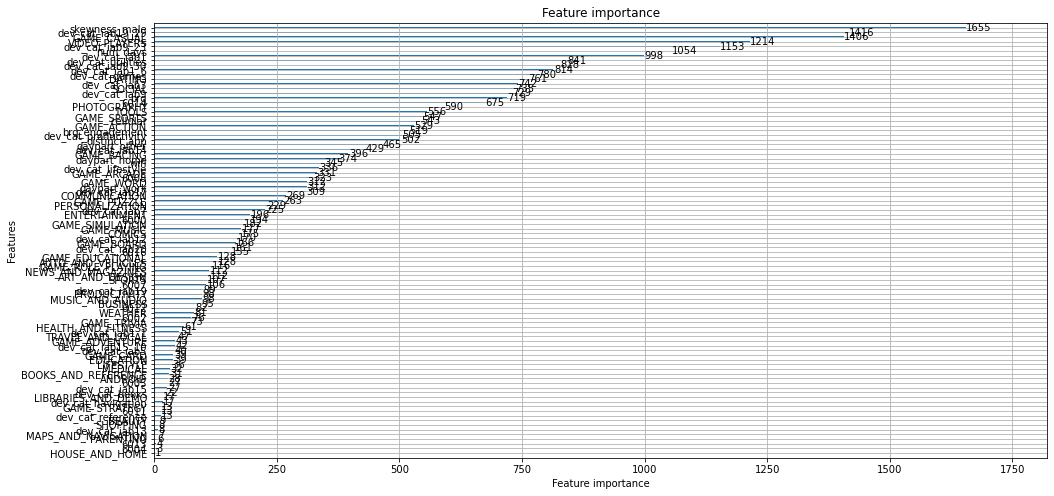

In [302]:

bst.save_model('model.txt', num_iteration=bst.best_iteration)
lgb.plot_importance(bst, figsize=(16,8))

In [ ]:
test = pd.read_csv('../input/test.csv')
test_x = test.iloc[:, 1:].values # Drop the ID_code
ypred = bst.predict(test_x)
test_code = test.iloc[:, 0]
submission = pd.concat([test_code, pd.Series(ypred, name='target')], axis=1)
submission.to_csv('submissions.csv', index=False)

In [394]:
def evaluate_old(model, testing_set_x, testing_set_y):
    predictions = model.predict(testing_set_x)
    
    accuracy  = accuracy_score(testing_set_y, predictions[:] >= 0.5)
    roc_auc   = roc_auc_score(testing_set_y, predictions[:])
    precision = precision_score(testing_set_y, predictions[:] >= 0.5)
    recall    = recall_score(testing_set_y, predictions[:] >= 0.5)
    pr_auc    = average_precision_score(testing_set_y, predictions[:])
    
    result = pd.DataFrame([[accuracy, precision, recall, roc_auc, pr_auc]], columns=['Accuracy', 'Precision', 'Recall', 'ROC_auc','PR_auc'])
    return(result)
out_old = evaluate_old(bst,X_test,y_test)
out_old

,Accuracy,Precision,Recall,ROC_auc,PR_auc
0,0.886803,0.909915,0.966599,0.904287,0.985097


In [396]:
results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'ROC_auc','PR_auc'])
results = results.append(out_old)
results

,Accuracy,Precision,Recall,ROC_auc,PR_auc
0,0.886803,0.909915,0.966599,0.904287,0.985097


In [403]:
print_results(results, color = 'lightpink')

|||||||||||||||||||||||||||||||||||||||||||||||||||||||
[ Experiment Results ]
Accuracy:   0.8868033851880465
Precision:  0.9099151743638078
Recall:     0.9665992510863253
ROC Auc:    0.9042868864519347
PR Auc:     0.9850967709983607
|||||||||||||||||||||||||||||||||||||||||||||||||||||||


### Model - Predictions -

In [414]:
test_merged.head()

,num_days,brq,brq_engagement,gender,distinct_app,skewness_female,skewness_male,daypart_home,daypart_other,daypart_work,...,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,ANDROID,IOS,SMART PHONE,TABLET
0,1.0,370,370.00000,-1.0,1.0,0.0,0.948649,1.00000,0.00000,0.00000,...,1.0,0.0,0.00000,0.0,0.00000,0.0,1,0,1,0
1,1.0,1,1.00000,-1.0,7.0,0.0,0.000000,0.00000,0.00000,1.00000,...,0.0,0.0,0.04011,0.0,0.02931,0.0,0,1,0,0
2,172.0,6448,37.48837,-1.0,12.0,0.0,0.207196,0.56620,0.03567,0.39813,...,0.0,0.0,0.06166,0.0,0.48771,0.0,1,0,1,0
3,16.0,598,37.37500,-1.0,2.0,0.0,0.765886,0.73746,0.08528,0.17726,...,0.0,0.0,0.00000,0.0,0.71591,0.0,1,0,1,0
4,3.0,4,1.33333,-1.0,2.0,0.0,0.500000,0.25000,0.00000,0.75000,...,0.0,0.0,0.58448,0.0,0.41552,0.0,1,0,1,0


In [ ]:
# test_ifa_vals - ifa values

In [415]:
test_Y = test_merged['gender']
test_X = test_merged.drop('gender', axis=1)

In [416]:
#bst predictions
predicted_probs = bst.predict(test_X)
predicted_probs

array([0.94692582, 0.77437735, 0.99547982, ..., 0.46059863, 0.78101956,
       0.55543941])

In [417]:
len(predicted_probs)

49737

In [418]:
bst_df = pd.DataFrame({'ifa': test_ifa_vals,'Predicted_Probs':predicted_probs})
# pdout.rename(columns = {0:'Target'},inplace = True)
bst_df

,ifa,Predicted_Probs
0,8e932096849088aa76a953ce2f69728db6b6cdc056cd91...,0.946926
1,9ba004d2e45aa4ae05935634f6198bf81e8766cb76a2bc...,0.774377
2,17a74969d7681ff8e206aeb7ba0e83300c8d4ed1f6db80...,0.995480
3,c8f3ddc5e2b0b3deacdb49181bc170363e5d01c992a660...,0.996855
4,9c0c1acf953e443c577a30350a723ddf0a818e0763dce3...,0.998650
...,...,...
49732,d10c52e7c47bad5eb0599766a21885f34ff14aa43970ec...,0.560122
49733,d28fa808dbfed21864772dad6039592944724432817d60...,0.906669
49734,9755e3ed26f9104828f2e088cd03bf2c50cc51510b2529...,0.460599
49735,f77195b5ea5877ce5d8caf78e207b85056ba6d9b684515...,0.781020


In [419]:
bst_df.to_csv('lightgbm_model_predicted_probs.csv',index = False)

In [420]:
bst_df.head(5)

,ifa,Predicted_Probs
0,8e932096849088aa76a953ce2f69728db6b6cdc056cd91...,0.946926
1,9ba004d2e45aa4ae05935634f6198bf81e8766cb76a2bc...,0.774377
2,17a74969d7681ff8e206aeb7ba0e83300c8d4ed1f6db80...,0.995480
3,c8f3ddc5e2b0b3deacdb49181bc170363e5d01c992a660...,0.996855
4,9c0c1acf953e443c577a30350a723ddf0a818e0763dce3...,0.998650


## Light GBM - Explorations

In [371]:
import shap
import numpy  as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.impute   import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score, auc, roc_curve, precision_recall_curve, roc_auc_score, precision_score, recall_score, average_precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost  import XGBClassifier

plt.style.use('ggplot')

In [375]:
def evaluate(model, testing_set_x, testing_set_y):
    predictions = model.predict_proba(testing_set_x)
    
    accuracy  = accuracy_score(testing_set_y, predictions[:,1] >= 0.5)
    roc_auc   = roc_auc_score(testing_set_y, predictions[:,1])
    precision = precision_score(testing_set_y, predictions[:,1] >= 0.5)
    recall    = recall_score(testing_set_y, predictions[:,1] >= 0.5)
    pr_auc    = average_precision_score(testing_set_y, predictions[:,1])
    
    result = pd.DataFrame([[accuracy, precision, recall, roc_auc, pr_auc]], columns=['Accuracy', 'Precision', 'Recall', 'ROC_auc','PR_auc'])
    return(result)
def run_experiment(df, model_class, n = 100, **kwargs):
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'ROC_auc','PR_auc'])
    for i in range(n):
        # Compose dataset
        train_x, test_x = train_test_split(df,
                               test_size = 0.3,
                               stratify  = df['gender'],
                               random_state = i
                                )
        
        train_y = train_x.pop('gender')
        test_y  = test_x.pop('gender')
        
        # Train Model
        model = model_class(**kwargs)
        model.fit(train_x, train_y)
         
        # Evaluate results
        current_result = evaluate(model, test_x, test_y)
        results = results.append(current_result)
        
    return(results.reset_index(drop=True))
def print_results(df, plot = True, extras = False, color='dodgerblue'):
    print('|||||||||||||||||||||||||||||||||||||||||||||||||||||||')
    print('[ Experiment Results ]')
    print('Accuracy:   {}'.format(df.Accuracy.mean()))
    print('Precision:  {}'.format(df.Precision.mean()))
    print('Recall:     {}'.format(df.Recall.mean()))
    print('ROC Auc:    {}'.format(df.ROC_auc.mean()))
    print('PR Auc:     {}'.format(df.PR_auc.mean()))
    print('|||||||||||||||||||||||||||||||||||||||||||||||||||||||')
    
    if plot:
        fig = px.box(df.melt(var_name='metric'),
                       y = 'metric',
                       x = 'value',
                       title = 'Distribution of Metric Values Across 100 Runs',
                       color_discrete_sequence=[color]
                      )

        fig.update_xaxes(title='Metric')
        fig.update_yaxes(title='Value')

        fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 00)',
                           'paper_bgcolor': 'rgba(240, 240, 240, 100)'})
        fig.show()
        
        
    if extras:
        print('Also, the maximum results were:')
        print('    Accuracy:   {}'.format(df.Accuracy.max()))
        print('    Precision:  {}'.format(df.Precision.max()))
        print('    Recall:     {}'.format(df.Recall.max()))
        print('    ROC Auc:    {}'.format(df.ROC_auc.max()))
        print('    PR Auc:     {}'.format(df.PR_auc.max()))

def evaluate(model, testing_set_x, testing_set_y):
    predictions = model.predict_proba(testing_set_x)
    
    accuracy  = accuracy_score(testing_set_y, predictions[:,1] >= 0.5)
    roc_auc   = roc_auc_score(testing_set_y, predictions[:,1])
    precision = precision_score(testing_set_y, predictions[:,1] >= 0.5)
    recall    = recall_score(testing_set_y, predictions[:,1] >= 0.5)
    pr_auc    = average_precision_score(testing_set_y, predictions[:,1])
    
    result = pd.DataFrame([[accuracy, precision, recall, roc_auc, pr_auc]], columns=['Accuracy', 'Precision', 'Recall', 'ROC_auc','PR_auc'])
    return(result)


In [376]:
rf_optimal = {
              'n_estimators':2100,
              'max_depth':27,
              'max_features':0.15,
              'max_samples':0.5363991145732665,
              'min_samples_split':2,
              'min_samples_leaf':4,
              'n_jobs':-1,
              'random_state':451,
            }

In [377]:
rf_experiment = run_experiment(new_df, model_class = RandomForestClassifier, **rf_optimal)
print_results(rf_experiment, color = '#3F3F3F')

KeyboardInterrupt: 

In [379]:
#Hyperparameter Tuning
optimal_1 = {'learning_rate': 0.02956340635276464,
 'n_estimators': 3831,
 'num_leaves': 101,
 'max_depth': 28,
 'max_bin': 211,
 'bagging_freq': 9,
 'bagging_fraction': 0.9292245982209768,
 'feature_fraction': 0.95,
 'lambda_l1': 2.50667180728151,
 'lambda_l2': 4.010110517090694,
 'drop_rate': 0.5917712341785191,
 'min_child_samples': 15,
 'min_child_weight': 3,
 'min_split_gain': 0.0,
 'scale_pos_weight': 0.283126887443018,
 'boosting_type': 'gbdt',
 'bagging_seed': 42,
 'metric': 'auc',
 'verbosity': -1,
 'random_state': 451,
 'max_drop': 50}

optimal_2 = {'learning_rate': 0.05744913989406643,
 'n_estimators': 2067,
 'num_leaves': 8,
 'max_depth': 27,
 'max_bin': 384,
 'bagging_freq': 5,
 'bagging_fraction': 0.7038650070406707,
 'feature_fraction': 0.4806588217742334,
 'lambda_l1': 2.841137907985995,
 'lambda_l2': 5.983397074528167,
 'drop_rate': 0.490746746058113,
 'min_child_samples': 3,
 'min_child_weight': 0,
 'min_split_gain': 0.0,
 'scale_pos_weight': 9.91024410907254,
 'boosting_type': 'gbdt',
 'bagging_seed': 42,
 'metric': 'auc',
 'verbosity': -1,
 'random_state': 451,
 'max_drop': 50}

optimal_3 = {'learning_rate': 0.05744913989406643,
 'n_estimators': 2067,
 'num_leaves': 8,
 'max_depth': 27,
 'max_bin': 384,
 'bagging_freq': 5,
 'bagging_fraction': 0.7038650070406707,
 'feature_fraction': 0.4806588217742334,
 'lambda_l1': 2.841137907985995,
 'lambda_l2': 5.983397074528167,
 'drop_rate': 0.490746746058113,
 'min_child_samples': 3,
 'min_child_weight': 0,
 'min_split_gain': 0.0,
 'scale_pos_weight': 0.91024410907254,
 'boosting_type': 'gbdt',
 'bagging_seed': 42,
 'metric': 'auc',
 'verbosity': -1,
 'random_state': 451,
 'max_drop': 50}

In [381]:
# Model #1
lgbm_experiment_1 = run_experiment(new_df, model_class = LGBMClassifier, **optimal_1)
print_results(lgbm_experiment_1, color = '#8400E8')

[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.95, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.95
[LightGBM] [Warning] bagging_fraction is set=0.9292245982209768, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9292245982209768
[LightGBM] [Warning] lambda_l2 is set=4.010110517090694, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.010110517090694
[LightGBM] [Warning] lambda_l1 is set=2.50667180728151, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.50667180728151
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.95, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.95
[LightGBM] [Warning] bagging_fraction is set=0.9292245982209768, subsample=1.0 will be ignored. Current value: bagging_fract

In [382]:
# Model #2
lgbm_experiment_2 = run_experiment(new_df, model_class = LGBMClassifier, **optimal_2)
print_results(lgbm_experiment_2, color = '#00E800')

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4806588217742334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4806588217742334
[LightGBM] [Warning] bagging_fraction is set=0.7038650070406707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7038650070406707
[LightGBM] [Warning] lambda_l2 is set=5.983397074528167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.983397074528167
[LightGBM] [Warning] lambda_l1 is set=2.841137907985995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.841137907985995
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4806588217742334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4806588217742334
[LightGBM] [Warning] bagging_fraction is set=0.7038650070406707, s

In [383]:
# Model #3
lgbm_experiment_3 = run_experiment(new_df, model_class = LGBMClassifier, **optimal_3)
print_results(lgbm_experiment_3, extras=True, color = '#00A4E8')


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4806588217742334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4806588217742334
[LightGBM] [Warning] bagging_fraction is set=0.7038650070406707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7038650070406707
[LightGBM] [Warning] lambda_l2 is set=5.983397074528167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.983397074528167
[LightGBM] [Warning] lambda_l1 is set=2.841137907985995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.841137907985995
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4806588217742334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4806588217742334
[LightGBM] [Warning] bagging_fraction is set=0.7038650070406707, s

Also, the maximum results were:
    Accuracy:   0.887014081539488
    Precision:  0.9190238063058714
    Recall:     0.9583968241238271
    ROC Auc:    0.9064419899808716
    PR Auc:     0.9854883077623273


In [385]:
# Lets train a single model first
train_x, test_x = train_test_split(new_df,
                                   test_size = 0.3,
                                   stratify  = new_df['gender'],
                                   random_state = 451
                                  )
        
train_y = train_x.pop('gender')
test_y  = test_x.pop('gender')


model = LGBMClassifier(**optimal_3)
model.fit(train_x, train_y)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4806588217742334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4806588217742334
[LightGBM] [Warning] bagging_fraction is set=0.7038650070406707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7038650070406707
[LightGBM] [Warning] lambda_l2 is set=5.983397074528167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.983397074528167
[LightGBM] [Warning] lambda_l1 is set=2.841137907985995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.841137907985995


LGBMClassifier(bagging_fraction=0.7038650070406707, bagging_freq=5,
               bagging_seed=42, drop_rate=0.490746746058113,
               feature_fraction=0.4806588217742334, lambda_l1=2.841137907985995,
               lambda_l2=5.983397074528167, learning_rate=0.05744913989406643,
               max_bin=384, max_depth=27, max_drop=50, metric='auc',
               min_child_samples=3, min_child_weight=0, n_estimators=2067,
               num_leaves=8, random_state=451,
               scale_pos_weight=0.91024410907254, verbosity=-1)

In [386]:
# Extract shap values
explainer   = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_x)

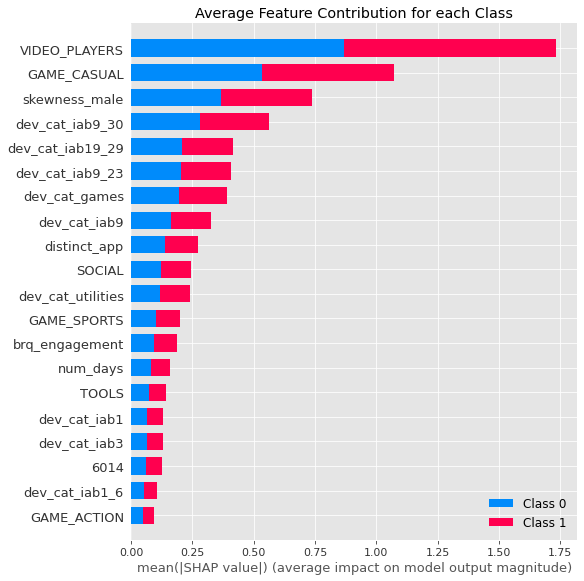

In [387]:
# Average feature contribution
plt.title('Average Feature Contribution for each Class')
shap.summary_plot(shap_values, train_x, plot_type="bar")

In [391]:
out = evaluate(model,test_x,test_y)
out

,Accuracy,Precision,Recall,ROC_auc,PR_auc
0,0.885996,0.916816,0.956612,0.903868,0.984853


# Next Steps to better this model prediction
## --------------------------------------------------

### To further enhance the predictions - One can find the best individual models and run a GridSearchCV on the overall Voting classifier

#### Hyper Parameter Tuning - GridSearchCV to rescue!

## AdaBoost Classifier - GridSearchCV - HyperParameter Tuning

In [86]:

# Taking - RUS - Data
ABC = AdaBoostClassifier(DecisionTreeClassifier())

ABC_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__splitter" :   ["best", "random"],
                  "algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :[5,6,7,8,9,10,20,30,40,50],
                  "learning_rate":  [0.001, 0.01, 0.1, 0,2, 0.3]}

gsABC = GridSearchCV(ABC, param_grid = ABC_param_grid, cv = 5, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsABC.fit(X_resampled_us,y_resampled_us)

ada_best = gsABC.best_estimator_
print(ada_best)
print(gsABC.best_score_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


KeyboardInterrupt: 

In [ ]:
y_pred = ada_best.predict(X_test)

print (f'model : ABC and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
print (f'model : ABC and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
print (f'model : ABC and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
print("Current model classification report: ")
print(classification_report(y_test, y_pred))

## Extra Tree Classifer - GridSearchCV

In [ ]:
ExtC = ExtraTreesClassifier()

ex_param_grid = {"max_depth": [3, 4, 5],
                 "max_features": [3, 10, 15],
                 "min_samples_split": [2, 3, 4],
                 "min_samples_leaf": [1, 2],
                 "bootstrap": [False,True],
                 "n_estimators" :[100,200,300],
                 "criterion": ["gini","entropy"]}

gsExtC = GridSearchCV(ExtC, param_grid = ex_param_grid, cv = 5, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsExtC.fit(X_resampled_us,y_resampled_us)

ext_best = gsExtC.best_estimator_

print(gsExtC.best_score_)

In [ ]:
y_pred = ext_best.predict(X_test)

print (f'model : ETC  and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
print (f'model :  ETC and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
print (f'model :  ETC and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
print("Current model classification report: ")
print(classification_report(y_test, y_pred))

## Random Forest - GridSearchCV

In [ ]:
rf_test = {"max_depth": [24,26],
           "max_features": [6,8,10,15,20],
           "min_samples_split": [3,4],
           "min_samples_leaf": [3,4],
           "bootstrap": [True],
           "n_estimators" :[50,80],
           "criterion": ["gini","entropy"],
           "max_leaf_nodes":[26,28],
           "min_impurity_decrease":[0.0],
           "min_weight_fraction_leaf":[0.0]}

tuning = GridSearchCV(estimator = RandomForestClassifier(), param_grid = rf_test, scoring = 'roc_auc', n_jobs = 6, cv = 5)

tuning.fit(X_resampled_us,np.ravel(y_resampled_us))

rf_best = tuning.best_estimator_

print(tuning.best_score_)

In [ ]:
y_pred = rf_best.predict(X_test)

print (f'model : RF  and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
print (f'model :  RF and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
print (f'model :  RF and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
print("Current model classification report: ")
print(classification_report(y_test, y_pred))

## Gradient Boosting - GridSearchCV

In [ ]:
GBM = GradientBoostingClassifier()

gb_param_grid = {'loss' : ["deviance"],
                 'n_estimators' : [450,460,500],
                 'learning_rate': [0.1,0.11],
                 'max_depth': [7,8],
                 'min_samples_leaf': [30,40],
                 'max_features': [0.1,0.4,0.6]}

gsGBC = GridSearchCV(GBM, param_grid = gb_param_grid, cv = 5, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsGBC.fit(X_resampled_us,y_resampled_us)

gbm_best = gsGBC.best_estimator_

print(gsGBC.best_score_)

In [ ]:
y_pred = gbm_best.predict(X_test)

print (f'model : GB  and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
print (f'model :  GB and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
print (f'model :  GB and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
print("Current model classification report: ")
print(classification_report(y_test, y_pred))

## XGBoost - GridSearchCV

In [ ]:
XGB = XGBClassifier()

xgb_param_grid = {'learning_rate': [0.1,0.04,0.01], 
                  'max_depth': [5,6,7],
                  'n_estimators': [350,400,450,2000], 
                  'gamma': [0,1,5,8],
                  'subsample': [0.8,0.95,1.0]}

gsXBC = GridSearchCV(XGB, param_grid = xgb_param_grid, cv = 5, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsXBC.fit(X_resampled_us,y_resampled_us)

xgb_best = gsXBC.best_estimator_

print(gsXBC.best_score_)

In [ ]:
y_pred = xgb_best.predict(X_test)

print (f'model : XGB  and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
print (f'model :  XGB and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
print (f'model :  XGB and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
print("Current model classification report: ")
print(classification_report(y_test, y_pred))

## LGBM Classifier - GridSearchCV

In [ ]:
LGBM = LGBMClassifier(random_state=0)

lgbm_param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

gsLGBM = GridSearchCV(LGBM, param_grid= lgbm_param_grid, cv= 5,scoring = "roc_auc", n_jobs = 6, verbose = 1 )

gsLGBM.fit(X_resampled_us,y_resampled_us)

lgbm_best = gsLGBM.best_estimator_

print(lgbm_best.best_score_)

In [ ]:
y_pred = lgbm_best.predict(X_test)

print (f'model : LGBM  and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
print (f'model :  LGBM and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
print (f'model :  LGBM and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
print("Current model classification report: ")
print(classification_report(y_test, y_pred))

## CatBoost - GridSearchCV

In [ ]:
CATB = CatBoostClassifier(verbose=False,random_state=0)

catb_param_grid = {'learning_rate': [0.1,0.05,0.01], 
                  'max_depth': [5,6,7],
                  'n_estimators': [350,400,50,100]}

gsCB = GridSearchCV(CATB, param_grid= catb_param_grid, cv= 5,scoring = "roc_auc", n_jobs = 6)

gsCB.fit(X_resampled_us,y_resampled_us)

cb_best = gsCB.best_estimator_

print(cb_best.best_score_)

In [ ]:
y_pred = cb_best.predict(X_test)

print (f'model : CB  and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
print (f'model :  CB and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
print (f'model :  CB and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
print("Current model classification report: ")
print(classification_report(y_test, y_pred))

## Logistic Regression - GridSearchCV

In [ ]:
LR = LogisticRegression()

lr_param_grid = {'C':np.logspace(-3,3,7), 'penalty':['l1','l2']}}

gslr = GridSearchCV(LR, param_grid= catb_param_grid, cv= 5,scoring = "roc_auc", n_jobs = 6)

gslr.fit(X_resampled_us,y_resampled_us)

lr_best = gslr.best_estimator_

print(lr_best.best_score_)

In [ ]:
y_pred = lr_best.predict(X_test)

print (f'model : LR and  roc_auc_score score is : {round(roc_auc_score(y_test, y_pred),4)}')
print (f'model :  LR and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')
print (f'model :  LR and  average_precision_score score is : {round(average_precision_score(y_test, y_pred),4)}')
print("Current model classification report: ")
print(classification_report(y_test, y_pred))